# Проект 03. Исследование объявлений о продаже квартир.

## Шаг 1. Откройте файл с данными и изучите общую информацию

### 1.	Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas. Путь к файлу: /datasets/real_estate_data.csv.

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

data = pd.read_csv('real_estate_data.csv', sep=  '\t')

### 2.	Изучите общую информацию о полученном датафрейме.

Посмотрим на собственно начало и конец датафрейма:

Посмотрим общую информацию о данных:

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак:
1. Датафрейм содержит 23699 строк (объявлений), по каждому - 22 столбца (параметра).      
Основной интересующий нас параметр - last_price (цена на момент снятия с публикации). В нем пропуска данных нет, судя по цифрам в колонке цены приведены в рублях.     
2. Данные по некоторым параметрам (общая площадь квартиры, число комнат,этаж, свободная планировка) представлены полностью, без пропусков,     
Данные по некоторым параметрам (площадь кухни, число балконов, количество этажей в доме, название населённого пункта и другие гео-данные) указаны с пропусками, которые в случае по всей видимости нужно будет заполнять рассчетными параметрами (в случае параметров квартир и домов, возможно шео-данных по извсестным locality_name), либо возможно - исключать из анализа (отсутствующие данные по locality_name например)
3. Необходимо будет поменять типы данных по многим колонкам (навскидку - минимум по 7, включая дату публикации объявления).  Хорошо бы сделать это сейчас, но поскольку в проекте на это есть отдельное задание - будем идти по плану проекта.
4. Есть высокая вероятность, что в столбце "locality_name" будут искажения в написании мест расположения недвижимости.

Посмотрим основную информацию о численных столбцах:

In [139]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видится следующее:
1. Данные вполне адекватные: 
    продают в медиане двухкомнатные кватриры рлощадью 52 кв. метра (что нормально),    
    с 9-метровой кухней, на 4 этаже в девятиэтажке (т.е. не первый и не последний этаж вполне "среднего" дома) за 4.65М рублей, что конечно дешево, но вполне реально.
2. Медианные и средние вполне заметно отличаются.       
    Поэтому нужно будет обратить внимание на наличие/отсутствие "выбросов" и их или склрректировать или удалить.    
3. Данные по максимальным величинам по многим параметрам (общая площадь, число комнат, этаж, высота потолков) видятся неадекватными, что скорее всего означает, что часть строк (объявлений) либо являются эксклюзивными предложениями, либо информация о параметрах в них действительно нереальна.    
    Поэтому по всей видимости эти строки нужно будет исключить из рассмотрения.

### 3.	Постройте гистограмму для всех числовых столбцов таблицы на одном графике. Например, для датафрейма data можно построить такую гистограмму командой data.hist(figsize=(15, 20)). Напомним, что параметр figsize задаёт размер графика.

К сожалению как сделать в одном фрейме гистограмму стольких параметров со столь разными диапазонами значений (например в 'last_price' миллионы, в 'airports_nearest' десятки тысяч, в 'total_area' сотни, а в 'rooms' единицы) я не знаю. Нужно будет изучить вопрос о том, можно ли все такие столбцы как-то отнормализовать в рамках метода hist() или plot() и если можно - то как.
Но пока выведем просто гистограммы по столбцам каждая с параметрами по умолчанию (то есть с 10 корзинами в диапазоне между max и min):

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

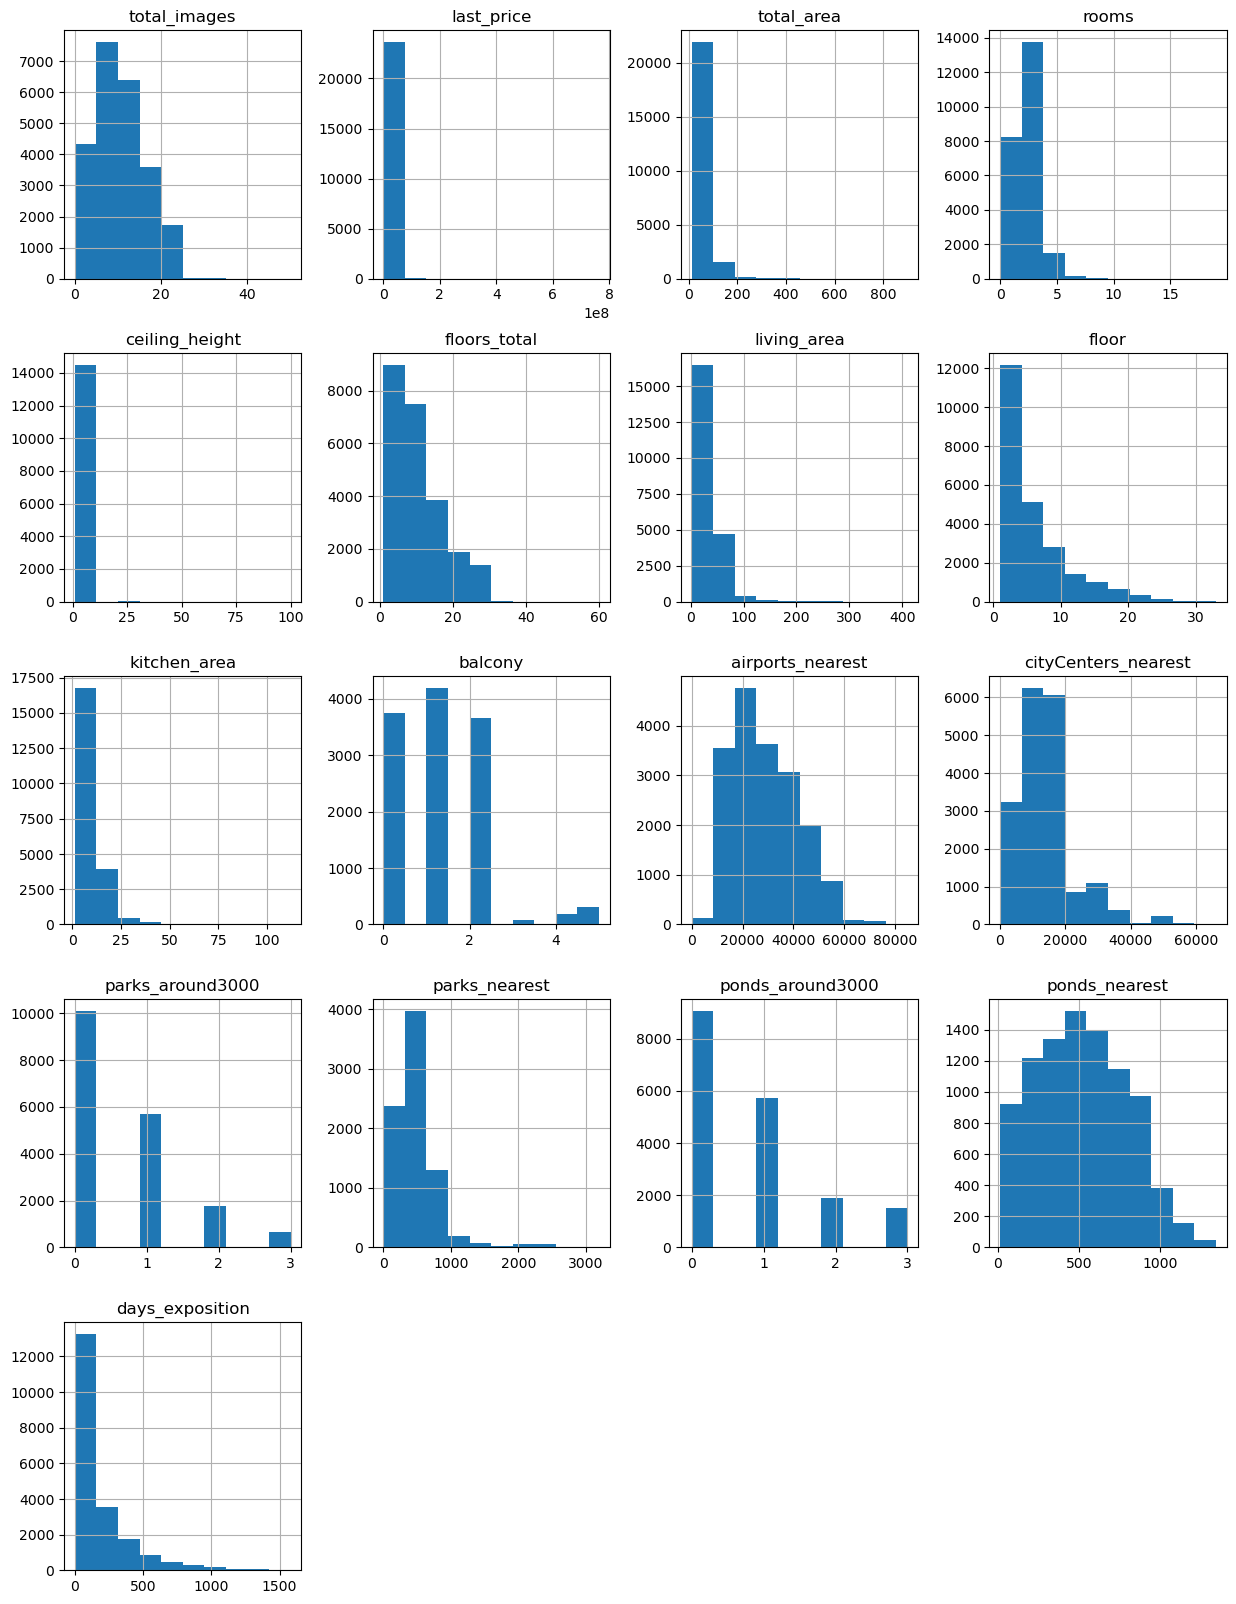

In [140]:
data.hist(figsize=(15, 20))

Графики показывают что:
1. Ненулевые значения во многих графиках сосредеточены в относительно узкой области ( за исключением 'airports_nearest', 'ponds_nearest', 'parks_around3000' и 'pinds_around3000'), что подтверждает гипотезу о наличии выбросов в этих параметрах. Даже для количества балконов есть значение 5, что крайне маловероятно.     
2. В графиках для 'last_price' и для 'ceiling_height' практически все значения сосредоточены в 1-2 бинах (корзинах): хорошо бы посмотреть гистограммы для них более подробно (с ограничением диапазонов и с большим количеством корзин).     
3. Поскольку по сути данные в столбцах 'total_area', 'living_area' и 'kitchen_area' взаимозависимы то они по идее должны показывать похожую картину распределения (хотя 'kitchen_area'наверное может отличаться): было бы полезно посмотреть их гистограммы на в одном фрейме (похоже, что разброс значений позволяет их совместить).  

Постороим гистограмму для 'last_price' с ограничением диапазонов и с большим количеством корзин.

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

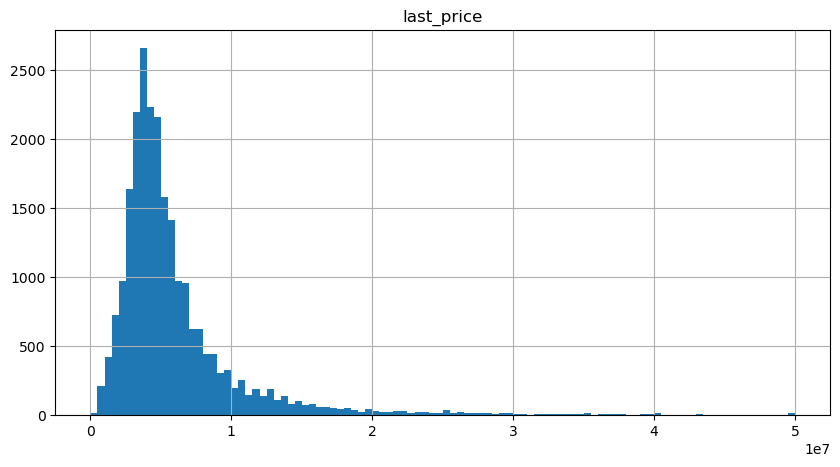

In [141]:
data.hist('last_price', bins=100, range=(0,50000000), figsize=(10,5))

Видим, что на самом деле гистограмма логична и похоже соответствует параметрам, полученным из data.describe()   
Цены, выше 20М рублей уже не составляют сколько нибудь значительную величину и по всей видимости могут быть отброшены (включая максимальный выброс в 760М рублей). 

Аналогично посмотрим на один из важнейших параметров - "total_area". Постороим и для него гистограмму с ограничением диапазонов и с большим количеством корзин.

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

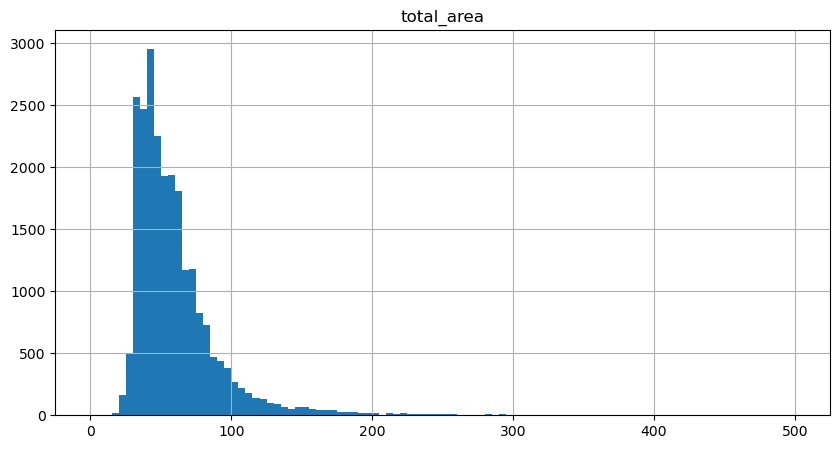

In [142]:
data.hist('total_area', bins=100, range=(0,500), figsize=(10,5))

Видим, что эта гистограмма логична и похоже соответствует параметрам, полученным из data.describe()   
Площади, больше выше 200 кв. метров можно считать индивидуальными предложениями, не влияющими на поведение рынка. 

Проверим гипотезу о "похожести" гистограмм для "total_area", "living_area" и "kitchen_area". Попробуем постороить гистограммы для всех трех в одном фрейме. Разброс значений здесь вполне сопоставим. Нас учили делать такие совмещенные гистограммы для двух параметров методом plot(). Попробуем теперь сделать так-же для трех.

<Axes: title={'center': 'Распределение количества объектов по площади: общей, жилой и кухни'}, ylabel='Frequency'>

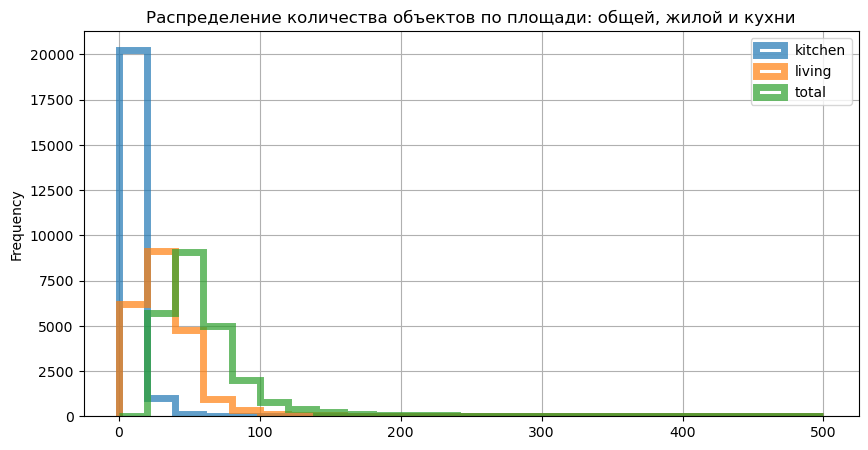

In [144]:
# Создаем гистограмму для площади кухни и относим ее к переменной ax1 
ax1 = data.plot(
    kind='hist',
    y='kitchen_area',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='kitchen',
    figsize=(10,5)
)

# Создаем совместную гистограмму для жилой площади и площади кухни и относим ее к переменной ax2
ax2 = data.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='living',
    ax=ax1,
    grid=True,
    legend=True,
    figsize=(10,5)
) 

# Создаем совместную гистограмму для общей, жилой площади и площади кухни 
# объединяя в одном фрейме гистограмму для 'total_area' и ax2
data.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='total',
    ax=ax2,
    grid=True,
    legend=True,
    title='Распределение количества объектов по площади: общей, жилой и кухни', 
    figsize=(10,5)
) 


Видим, что на самом деле гистограммы площадей квартир (общей, жилой и кухни) в общем скорее подтверждают гипотезу. Общая и жилая площади хорошо соответствуют друг другу, а отличия в графике площади кухни могут быть объяснены тем, что вариантов площадей кухни для "промышленных" квартир (без индивидуальной перепланировки) - вообще ограниченное количество и соответственно разброс их площади сильно меньше, чем общей и жилой плошади.    
При этом заметим, что "узкий" хвост гистограммы тянется довольно далеко в область высоких значений. Квартиры с общей площадью больше 200 кв.м. являются индивидуальными и могут быть исключены из рассмотрения. Аналогичная ситуация для значений жилой площади выше 120 кв.м. и площади кухни выше 40 кв.м.

## Шаг 2. Предобработка данных

### 1.	Найдите и изучите пропущенные значения в столбцах: 
    - Определите, в каких столбцах есть пропуски.     
    - Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски. Пропущенные значения — тоже важный сигнал, который нужно учитывать.     
    - В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

Изначально выведем количество пропусков по каждому столбцу, чтобы было перед глазами и 
потом после заполнения/удаления пропусков бутем при помощи этого же вывода проверять - что сделано, что осталось.

In [145]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Из data.head и tail, а также из data.isna().sum() видим, что пропуски данных есть в 14-ти параметрах (столбцах), причем в 10 из них количество пропусков существенно.

Общая ситуация с пропусками и возможными причинами их возникновения следующая:

ceiling_height - высота потолков (м): пропусков 9 195 или 38,8% от общего количества. Заполнение ручное. Причина: Люди просто не знают точно высоту потолков, а приблизительно не решаются заполнять. В результате оставляют графу пустой.   
Предложение по заполнению: Медианное значение по всем объявлениям.

floors_total - всего этажей в доме: пропусков 86 или 0,4%. Заполнение ручное. По всей видимости люди просто не считают это существенным и не дают себе труд вспомнить сколько этажей в доме.   
Предложение по заполнению: Думаю можно не заполнять.

living_area - жилая площадь в квадратных метрах (м²):	пропусков 1 903 или	8,0%. Заполнение ручное. Вероятнее всего люди не помнят точно, документы при заполнении не под рукой и люди рассуждают: "общей площади достаточно, а потом если будут звонить и интересоваться - посмотрю в документах". Предположение: не указывают с общим ощущением " а что указывать - обычная, как у всех".   
Предложение по заполнению: Параметр существенный. 8% жалко. Что делать - на 100% неясно. Можно попробовать взять медиану соотношения общей и жилой площади для танного вида квартир (по количеству комнат).

is_apartment  -	апартаменты (булев тип - да/нет): пропусков 20 924	- 88,3%.	Заполнение ручное. В подавляющем большинстве люди просто не очень понимают что такое апартаменты и считают этот вопрос ерундой какой-то.
Предложение по заполнению: Предполагаем, что везеде где не указано - это НЕ апартаменты и после преобразования типа из "object" в "bool" заполняем "False".

kitchen_area - площадь кухни в квадратных метрах (м²):  пропусков 2 278 - 9,6%.	Заполнение ручное. Аналогично графе о жилой площади: "кухня метров 8-9, сколько точно не помню: пока пропущу, а потом кто будет интересоваться - посмотрю точно по документам". Предположение о том, что не заполняют с общим ощущением " а что указывать - обычная, как у всех" - здесь тоже валидно.   
Предложение по заполнению: Параметр существенный. 9.6% жалко. Что делать - на 100% непонятно. Можно попробовать взять медиану площади кухни для данного вида квартир (по количеству комнат).

balcony	- число балконов: пропусков	11 519	48,6%.	Заполнялось вручную. Видя такой вопрос люди, у которых в квартире есть балкон точно его укажут (это какое-никакое преимущество). А у кого балкона нет (а таких кватрир много) - вполне могут пропустить.   
Предложение по заполнению: Предполагаем, что везеде где не указано - балконов НЕТ. Соответственно заполняем 0.

locality_name	- название населённого пункта: пропусков	49	0,2%	Заполнение ручное. То, что населенный пункт не указан может быть обусловлено двумя факторами: либо просто случайность, либо полная уверенность заполняющего, чтовсе объявления касаются Санкт-Петербурга и писать тут нечего. Доля таких пропусков всего 0.2%.   
Предложение по заполнению: Параметр существенный, количество небольшое. Строки можно удалить.

airports_nearest - расстояние до ближайшего аэропорта в метрах (м): пропусков	5 542	23,4%.	Автоматическое заполнение. Возможно,  сбой программы при чтении названия населенного пункта, сбой в определении точного местоположения объекта, сбой в расчете расстояния (может там расстояние не считается если между населенным пунктом и аэропортом есть большая вода - Финский залив или Ладога - и алгоритм сбоит).   
Предложение по заполнению: Наверное есть смысл взять медианное (или среднее: после очистки от выбросов они должны быть близко) значение этого параметра для начеленного пункта.

cityCenters_nearest* - расстояние до центра города (м) : пропусков	5 519	23,3%.	Автоматическое заполнение. Ситуация с возможными причинами пропусков полностью аналогична предыдущему пункту. Кроме того, цифры очень похожи по количеству пропусков. По всей видимости причина та же. Предполагаю, что наиболее вероятная причина - невозможность точно определить местоположение объекта недвижимости.   
Предложение по заполнению: Аналогично предыдущему: считать медиану расстояния по населенному пункту.
* Из data.describe() мы увидели, что в параметре cityCenters_nearest среднее 14 км., медиана 13км. и даже 1-я квартили равна 9 км. Это может означать только одно - под cityCenter понимается центр Санкт-Петербурга, поскольку ни для какого городка в Ленинградской области такие расстояния представить невозможно. В дальнейшем будем предполагать, что это так и есть: в столбце "cityCenters_nearest" представлены расстояния до центра Питера.

parks_around3000 - число парков в радиусе 3 км: пропусков	5 518	23,3%.	Автоматическое заполнение. Предполагаю, что пропуски обусловлены теми же причинами, что и для расстояния до центра города и до аэропорта - очень похоже по количеству пропусков.   
Предложение по заполнению: Наверное есть смысл считать, что их нет и заполнить 0.

parks_nearest -	расстояние до ближайшего парка (м) : пропусков	15 620	65,9%.	Автоматическое заполнение. Соответственно ок. 5.5К пропусков имеют ту же причину, что и предыдущие автоматически заполненные столбцы. По остальным ок.10К - предполагаю, что пропуски обусловлены тем, что алгоритм просто не нашел в каком-то "разумном" окружении (в пределах города для Лен области или в пределах района СПБ) парка вообще.   
Предложение по заполнению: Максимум здесь = 3190. Наверное есть смысл сделать категорию "более 3 км" и всех "молчунов"  определить в нее.


ponds_around3000 - число водоёмов в радиусе 3 км: пропусков	: пропусков  5 518	23,3%.	Автоматическое заполнение. Предполагаю, что пропуски обусловлены теми же причинами, что и для парков, расстояния до центра города и до аэропорта - очень похоже по количеству пропусков.  
Предложение по заполнению: Считать, что их нет и заполнить 0.

ponds_nearest	- расстояние до ближайшего водоёма (м) : пропусков 14 589	61,6%.	Автоматическое заполнение. Ситуация ровно такая же, что и для парков: для 5.5К наиболее вероятная причина - невозможность отлоцировать объект, а для оставшихся 9К - алгоритм не нашел водоема в каком-то окружении.  
Предложение по заполнению: Максимум = 1390 м. Сделать категорию "более 1.5 км" и всех "молчунов"  определить в нее.

days_exposition - сколько дней было размещено объявление (от публикации до снятия) : пропусков 3 181	13,4%.	Это просто похоже на какой-то сбой. По всей видимости какие-то объявления выставлялись, снимались, опять выставлялись и т.п. Или что-то еще. Без более глубокого понимания технологии не вопрос "почему так" точнее не ответишь.  
Предложение по заполнению: Непонятно что с этим делать. Предложил бы пока оставим как есть.



Начнем с простого:     
    В начале удалим 49 строк с пропусками в столбце locality_name и 85 строк с пропусками в столбце "floors_total". Это суммарно меньше 1% от отбщей выборки и никак не ухудшит качество онализа;    
    Затем заполним пропуски в столбцах:
        ceiling_height (float64)  - медианным значением этого столбца,    
        balcony (float64), parks_around3000 (float64) и ponds_around3000 (float64) - значением = 0,    
        is_apartment (object) - значением = "False".    

Удалим 49 строк с пропусками в столбце "locality_name" и 85 строк с пропусками в столбце "floors_total".

In [146]:
data = data.dropna (subset=['locality_name', 'floors_total'])

print(data.shape)  # Проверка: изначально количество полностью заполненых строк было 23699. 
                            # Сейчас должно быть 2369 - 49 - 85 = 23565
print()
print(data.isna().sum())  # Проверка: в столбцах 'locality_name' и 'floors_total' 
                                   # количество пропусков должно быть 0

(23565, 22)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64


Пропусков в столбце "locality_name" нет, общее количество строк в датафрейме уменьшилось до 23650

Заполним пропуски в столбце "ceiling_height" медианным значением этого столбца

In [147]:
ceiling_height_median = data['ceiling_height'].median()
data.loc[:,'ceiling_height'] = data.loc[:,'ceiling_height'].fillna(ceiling_height_median)

print(ceiling_height_median)  # Проверка: на всякий случай сравнить со значением 2.65, выведенным в data.describe()
print()
print(data.loc[2, 'ceiling_height'])  # Проверка: изначально там стояло NaN. Сейчас должно быть 2.65
print()
print(data.isna().sum()) # Проверка: в столбце 'ceiling_height' количество пропусков должно быть 0

2.65

2.65

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64


Пропусков в столбце ceiling_height нет, они заполнены медианным значением по этому столбцу

Заполним пропуски в столбцах "balcony", "parks_around3000" и "ponds_around3000" значением 0

In [148]:
data.loc[:, ['balcony', 'parks_around3000', 'ponds_around3000']] = data.loc[:, ['balcony', 'parks_around3000', 'ponds_around3000']]. fillna (0)

print(data.loc[23695, ['balcony', 'parks_around3000', 'ponds_around3000']])  # Проверка: изначально там стояло NaN. Сейчас должно быть 0.00
print()
print(data.isna().sum()) # Проверка: в столбцах "balcony", "parks_around3000" и "ponds_around3000" пропусков должно быть 0

balcony             0.0
parks_around3000    0.0
ponds_around3000    0.0
Name: 23695, dtype: object

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64


Пропусков в столбцах "balcony", "parks_around3000" и "ponds_around3000" нет, они заполнены значением 0

Заполним пропуски в столбце "is_apartment" значением = False

In [149]:
print(data['is_apartment'].unique())  # Проверка: какие изначально есть значения

data.loc[:, 'is_apartment'] = data.loc[:, 'is_apartment'].fillna(False)

print(data['is_apartment'].unique())  # Проверка: правильно ли мы заменили именно на "False" 
print(data.loc[2, 'is_apartment'])  # Проверка: изначально там стояло NaN. Сейчас должно быть "False"
print()
print(data.isna().sum()) # Проверка: в столбце 'is_apartment' количество пропусков должно быть 0

[nan False True]
[False True]
False

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64


Пропусков в столбце "is_apartment" нет, они заполнены медианным значением по этому столбцу

Теперь нужно было бы заполнить пропущенные значения в столбцах, содержащих параметры квартир. 

Идея состоит в том, чтобы взять за основу данные об общей площади (пропусков в которых нет) и предположение, что квартиры в подавляющем большинстве "пропорциональны" и имеют примерно одинаковое соотношение жилой площади и площади кухни к общей площади.       
То есть для каждого типа квартиры (по количеству комнат) для столбцов "living_area" и "kitchen_area" посчитать медианное соотношение жилой площади и площади кухни соответственно к общей площади квартиры и далее посчитать жилую площадь и площадь кухни для квартир с пропусками в этих полях на основе общей площади и медианных долей жилой площади и площади кухни в ней.

Однако прежде, чем выполнять эти расчеты нужно быть уверенным в том, что объекты недвижимости в выборке достаточно репрезентативны (эксклюзивные предложения по определению не могут быть стандартными). То есть делать эти расчеты есть смысл только после "очистки" выборки от выбросов. 

Поэтому пока отложим их до выполения задания №1 шага 4, где мы будем обрабатывать аномалии.

Аналогичная ситуация с данными, автоматически заполненным по геолокации: пропусков в них довольно много и есть смысл сделать с этим что-то.
Поскольку брать данные из сторонних источников мы пока не умеем - Идея здесь в том, чтобы попробовать заменить пропуски на медианное значение для населенного пункта, а для н.п. для которых медиану посчитать невозможно (очевидно, что это будут мелкие поселки в области, в которых данное предложение просто одно и расстояние в нем не указано) - медианой по области (без Питера).
Медиану в данном случае брать лучше, поскольку каждое объявление "попадает" в наиболее вероятное для себя место (50% вероятность что на самом деле оно "справа" и 50% - что "слева"). Кроме того не так искажается реальная "живая" (не рассчитанная) выборка.

Однако, поскольку мы планируем заполнять пропуски в расстояниях медианным расстоянием, посчитанным для населенного пункта , а как мы предположили в столбце "locality_name" могут быть ошибки заполнения, то есть смысл вернуться к заполнению пропусков в "гео-столбцах" после того, как мы "наведем порядок" с названиями населенных пунктов.

Поэтому пока отложим их до все того же задания №1 шага 4, где постараемся рассмотреть более детально.

Далее перйдем к столбцу 'days_exposition' и попробуем посмотреть, что можно сделать с пропусками в нем.
Возможно есть смысл заменить пропуски здесь легко идентифицируемыми "выбросами" то есть заведомо нереальными для этого столбца значениями того же типа, что и все значения в столбце.
Однако такое заполнение пропусков существенно повлияет на статистические параметры распределения данных этого столбца. А с учетом того, что в дальнейшем нам нужно будет более подробно рассматривать зависимость продажных параметров от времени экспозиции - сейчас заполнять пропуски "выбросам" смысла никакого. нет.   
Пока оставим как есть.

Считаем, что в задании 1 шага 2 мы выполнили все что было разумным выполнить сейчас и переходим к преобразованию типов данных в столбцах

### 2.	Рассмотрите типы данных в каждом столбце: 
o	Найдите столбцы, в которых нужно изменить тип данных.    
o	Преобразуйте тип данных в выбранных столбцах.    
o	В ячейке с типом markdown поясните, почему нужно изменить тип данных.

Вспомним что у нас с типами данных

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest      18

Разберем ситуацию с типами данных столбец за столбцом:

total_images - число фотографий квартиры в объявлении: по сути это целочисленное значение, то есть должно быть int64, в датасете и есть int64, менять ничего не нужно.

last_price — цена на момент снятия с публикации: по сути это количество рублей с копейками - положительно вещественное число с точностью до второго знака (рубли с точностью до копеек), то есть должно быть float64, в датасете и есть float64, менять тип не нужно. Есть смысл округлить представление чисел до 2-х знаков после запятой (до копеек).

total_area — общая площадь квартиры в квадратных метрах (м²): по сути это значение в площади в квадратных метрах с точностью, по всей видимости большей, чем 1 кв.м., то есть дробная часть здесь уместна и логична. Значит это float64, как и сейчас в датасете, менять не нужно.

first_day_exposition — дата публикации: очевидно, что тип должен быть datetime, в датасете сейчас - тип object, значит нужно будет преобразовать.

rooms — число комнат: по сути это целочисленный показатель, то есть должно быть int64, в датасете и есть int64, менять ничего не нужно.

ceiling_height - высота потолков (м): по сути это значение в метрах с точностью до сантиметров, то есть float64, в датасете и есть float64, менять ничего не нужно. Есть смысл округлить представление чисел до 2-х знаков после запятой (до сантиметров).

floors_total - всего этажей в доме: целочисленный показатель, то есть должно быть int64, в датасете сейчас float64, значит нужно будет преобразовать.

living_area - жилая площадь в квадратных метрах (м²):  ситуация полностью аналогична столбцу "total_area" - должно быть float64, в датасете и есть float64, менять ничего не нужно.

floor — этаж: по сути это целочисленное значение, то есть должно быть int64, в датасете и есть int64, менять ничего не нужно.

is_apartment — апартаменты (булев тип): даже в описании прямо сказано, что тип должен быть булев. В датасете этот столбец типа object, нужно будет преобразовать.

studio — квартира-студия (булев тип): тип должен быть булев, в датасете он и есть булев, менять ничего не нужно.

open_plan — свободная планировка (булев тип): тип должен быть булев, в датасете он и есть булев, менять ничего не нужно.

kitchen_area - площадь кухни в квадратных метрах (м²): ситуация полностью аналогична столбцам "total_area" и "living_area" - должно быть float64, в датасете и есть float64, менять ничего не нужно.

balcony - целочисленный показатель, то есть должно быть int64, в датасете и есть float64, значит нужно будет преобразовать.

locality_name - название населённого пункта: должно быть название то есть строчный тип object, в датасете и есть object, менять ничего не нужно.

airports_nearest - расстояние до ближайшего аэропорта в метрах (м): значение столбца - это расстояние в метрах, причем точность этого расстояния не должно бы превышать метра, то есть можно было бы заменить на int64. Но по сути параметра (расстояние) - это float64, и в датасете сейчас тип float64. И кроме того в этом столбце сохранились пропуски, с которыми еще предстоит работать. Так что менять не будем, просто округлим представление чисел до 2-х знаков после запятой (до сантиметров).

cityCenters_nearest - расстояние до центра города (м) : Ситуация полностью аналогича столбцу "airports_nearest": расстояние это по сути float64, и в датасете сейчас тип float64. Менять не будем, просто округлим представление чисел до 2-х знаков после запятой (до сантиметров).

parks_around3000 - число парков в радиусе 3 км: целочисленный показатель, то есть должно быть int64, в датасете float64, значит нужно будет преобразовать.

parks_nearest - расстояние до ближайшего парка (м) : Ситуация полностью аналогича столбцам "airports_nearest" и "cityCenters_nearest": расстояние это по сути float64, и в датасете сейчас тип float64. Менять не будем, просто округлим представление чисел до 2-х знаков после запятой (до сантиметров).

ponds_around3000 - число водоёмов в радиусе 3 км: целочисленный показатель, то есть должно быть int64, в датасете float64, значит нужно будет преобразовать.

ponds_nearest - расстояние до ближайшего водоёма (м): то же, что и с очтальными гео-расстояниями: расстояние это по сути float64, и в датасете сейчас тип float64. Менять не будем, просто округлим представление чисел до 2-х знаков после запятой (до сантиметров). 

days_exposition - сколько дней было размещено объявление (от публикации до снятия) : количество дней это целочисленный показатель, то есть должно быть int64, в датасете float64, значит нужно будет преобразовать.      
Однако преобразовать по вспе видимости не получится, потому что в этом столбце содержатся пропуски, пропуски это infinite, а infinite не может быть преобразован из float64  int64. При этом заполнить пропуски чем-то целочисленным (например значением много большим, чем максимум, или значением медианы например) не представляется целесообразным, поскольку на нужно будет проводить более подробный анализ этой категории и нам важно не "сбивать" ее статистические параметры.


Таким образом нужно поменять тип данных:    
В одном столбце - с object на datetime,     
в одном столбце - с object на bool,      
в 4-х столбцах - с float64 на int64.    
При этом изменения типа данных в 11-ти столбцах не требуется, однако в 7-ти из них хорошо бы округлить данные до 2 знаков после запятой.

Для начала преобразуем дату в дату.    
Когда смотрели датасет - увидели, что данные в столбце "first_day_exposition" представлены в виде например 2019-03-07T00:00:00, то есть %Y-%m-%dT%H:%M:%S .

In [151]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

# Проверка: изменился ли формат
display(data.head(5))
print()
data.dtypes

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Тип и формат даты в столбце "first_day_exposition" изменён.

Теперь поменяем тип данных в столбце "is_apartment" с object на bool 

In [152]:
data['is_apartment'] = data['is_apartment'].astype('bool')

data.dtypes  # Проверка:визуализация результата 

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Тип данных в столбце "is_apartment" изменён с object на bool.

Теперь поменяем тип данных с float64 на int64 в столбцах 'floors_total', 'balcony', 'parks_around3000' и 'ponds_around3000'. 

In [153]:
data[['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']] = data[['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']].astype('int64')

data.dtypes  # Проверка:визуализация результата 

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Типы данных в преобразованы с float64 на int64 в 4-х  столбцах: 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000' и  'days_exposition'.

Теперь округлим до 2-х знаков после запятой значения цифровых данных в 7-и столбцах: 'last_price', 'ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest' и 'ponds_nearest'. 

In [154]:
data.loc[:, ['last_price', 'ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition']] = \
round( data.loc[:, ['last_price', 'ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition']], 2 )

display(data.head(10))  # Проверка:визуализация результата

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


Таким образом все запланированные преобразования типов данных и округления сделаны.

По датафрейму видно, что индексы идут не подряд. Обновим их и двинемся дальше.

In [155]:
data.reset_index(drop= True , inplace= True )

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


Считаем, что задание 2 шага 2 выполнено и переходим к столбцу 'locality_name' (не забывая после работы с ним вернуться к гео-расстояниям)

### 3.	Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. 
Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

Для начала попробуем найти и убрать (если таковые есть) из датасета явные дубликаты  

In [156]:
print(data.duplicated().sum())

0


Явных дубликатов в датасете нет.

Теперь попробуем визуально оценить как можно "снизить разнообразие" неявных дубликатов (и есть ли таковые)

In [157]:
data['locality_name'].sort_values(ascending=True).unique()  # Проверка: посмотреть глазами на список названий

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Видим, что достаточно много слов типа: "город", "поселок" и т.д., которые будут только мешать в анализе. Как видно все они написаны строчными буквами, поэтому переводить все значения в нижний регистр смысла особого нет (наоборот - идеально было бы оставлять только то, что здесь написано с прописной буквы, но увы - такого умения пока нет).

Попробуем составить более-менее полный их список и затем удалить их из столбца, оставив только названия.

Сначала заменим все ё на е

In [158]:
data.loc[:,'locality_name'] = data['locality_name'].str.replace('ё', 'е')

Составим список слов для удаления ( с учетом того, что ё на е уже заменили)

In [159]:
words_to_del = [ 'город ', 'городской ', 'поселок ', 'деревня ', 'городского типа ', 'село ', \
                'садовое товарищество ', 'садоводческое некоммерческое товарищество ', 'коттеджный ', \
                'при железнодорожной ', 'станции' ]                

Для замены различных поселков, деревень и других сопутствующих собственно названию слов запустим двойной цикл, который для каждого слова из списка words_to_del будет искать это слово в значениях столбца 'locality_name' и "заменять" на "" (то есть просто удалять). И для чистоты уберем лишние пробелы в начале и конце названий 

In [160]:
for i in range(len(data['locality_name'])):
    locality_name = data.loc[i, 'locality_name']
    for word in words_to_del:
        if word in locality_name:
            locality_name = locality_name.replace(word, '')
    data.loc[i, 'locality_name'] =  locality_name

Ну и наконец - уберем лишние пробелы в начале и в конце названия

In [161]:
data.loc[:, 'locality_name'] = data['locality_name'].str.strip()

data.loc[:, 'locality_name'].sort_values(ascending=True).unique()  # Проверка: посмотреть глазами на список названий

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

Все названия населенных пунктов выглядят адекватно.

Теперь можем вернуться к 4-м столбцам с гео-расстояниями: 'airports_nearest', 'cityCenters_nearest', 'parks_nearest' и 'ponds_nearest', в которых осталось много пропусков.     
Идея здесь в том, чтобы попробовать заменить пропуски на медианное значение для населенного пункта, а для н.п. для которых медиану посчитать невозможно (очевидно, что это будут мелкие поселки в области, в которых данное предложение просто одно и расстояние в нем не указано) - медианой по области (без Питера).

Создадим краткий путеводитель по Санкт-Петербургу и окресностям: датафрейм - справочник, где каждому населенному пункту из нашего основного датафрейма будет соответствовать медианные расстояния до аэропорта, центра Питера, до ближайшего парка и водоема.

In [162]:
# создаем пустой датафрейм
geo_guide = pd.DataFrame()

# заполняем данными по населенным пунктам и расстояниям простым переносом столбцов из нашего датафрейма
geo_guide['locality_name'] = data['locality_name']
geo_guide['airports_nearest'] = data['airports_nearest']
geo_guide['cityCenters_nearest'] = data['cityCenters_nearest']
geo_guide['parks_nearest'] = data['parks_nearest']
geo_guide['ponds_nearest'] = data['ponds_nearest']

# преобразуем данные в столбцах в медианные по населенным пунктам
#geo_guide = geo_guide.groupby('locality_name').median()


display(geo_guide)
print()
display(geo_guide.isna().sum())

,locality_name,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
0,Санкт-Петербург,18863.0,16028.0,482.0,755.0
1,Шушары,12817.0,18603.0,NaN,NaN
2,Санкт-Петербург,21741.0,13933.0,90.0,574.0
3,Санкт-Петербург,28098.0,6800.0,84.0,234.0
4,Санкт-Петербург,31856.0,8098.0,112.0,48.0
...,...,...,...,...,...
23560,Санкт-Петербург,24665.0,4232.0,796.0,381.0
23561,Тосно,NaN,NaN,NaN,NaN
23562,Рождествено,NaN,NaN,NaN,NaN
23563,Санкт-Петербург,39140.0,10364.0,173.0,196.0


locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_nearest          15535
ponds_nearest          14529
dtype: int64

На первый взгляд выглядит скверно: во всех четырех столбцах пропусков слишком много.

Посмотрим какая картина по медиане по городам.

In [163]:
display(geo_guide.groupby('locality_name').median())

,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
locality_name,,,,
Агалатово,NaN,NaN,NaN,NaN
Александровская,12896.5,27468.0,NaN,711.5
Алексеевка,NaN,NaN,NaN,NaN
Аннино,NaN,NaN,NaN,NaN
Аро,NaN,NaN,NaN,NaN
...,...,...,...,...
Яльгелево,NaN,NaN,NaN,NaN
Ям-Тесово,NaN,NaN,NaN,NaN
Янино-1,NaN,NaN,NaN,NaN


С медианой по городам картина еще хуже: для многих населенных пунктов данных просто нет.
    
Попробуем разбить на Питер и область и посмотреть что будет

In [164]:
geo_guide_spb = geo_guide[geo_guide['locality_name'] == 'Санкт-Петербург']
geo_guide_obl = geo_guide[geo_guide['locality_name'] != 'Санкт-Петербург']


display(geo_guide_spb.head(10))
display(geo_guide_spb.count())
display(geo_guide_spb.isna().sum())
display(geo_guide_spb.groupby('locality_name').median())
print()
display(geo_guide_obl.head(10))
display(geo_guide_obl.count())
display(geo_guide_obl.isna().sum())

,locality_name,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
0,Санкт-Петербург,18863.0,16028.0,482.0,755.0
2,Санкт-Петербург,21741.0,13933.0,90.0,574.0
3,Санкт-Петербург,28098.0,6800.0,84.0,234.0
4,Санкт-Петербург,31856.0,8098.0,112.0,48.0
7,Санкт-Петербург,23982.0,11634.0,NaN,NaN
9,Санкт-Петербург,50898.0,15008.0,NaN,NaN
10,Санкт-Петербург,38357.0,13878.0,310.0,553.0
15,Санкт-Петербург,12900.0,14259.0,590.0,296.0
16,Санкт-Петербург,22108.0,10698.0,420.0,NaN
17,Санкт-Петербург,33564.0,14616.0,NaN,859.0


locality_name          15651
airports_nearest       15567
cityCenters_nearest    15591
parks_nearest           7251
ponds_nearest           7936
dtype: int64

locality_name             0
airports_nearest         84
cityCenters_nearest      60
parks_nearest          8400
ponds_nearest          7715
dtype: int64

,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
locality_name,,,,
Санкт-Петербург,26763.0,12242.0,460.0,504.0


,locality_name,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
1,Шушары,12817.0,18603.0,NaN,NaN
5,Янино-1,NaN,NaN,NaN,NaN
6,Парголово,52996.0,19143.0,NaN,NaN
8,Мурино,NaN,NaN,NaN,NaN
11,Ломоносов,48252.0,51677.0,NaN,NaN
12,Сертолово,NaN,NaN,NaN,NaN
13,Петергоф,37868.0,33058.0,294.0,298.0
14,Пушкин,20782.0,30759.0,NaN,96.0
20,Парголово,53134.0,19311.0,NaN,NaN
22,Кудрово,NaN,NaN,NaN,NaN


locality_name          7914
airports_nearest       2474
cityCenters_nearest    2473
parks_nearest           779
ponds_nearest          1100
dtype: int64

locality_name             0
airports_nearest       5440
cityCenters_nearest    5441
parks_nearest          7135
ponds_nearest          6814
dtype: int64

По всей видимости следует признать, что пропуски в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_nearest' и 'ponds_nearest' заполнять чем-либо без привлечения внешних источников нет смысла: параметра, способного адекватно "заполнить пробелы" найти не удалось.    
При этом ситуация такова:
Распределение объявлений - из 23565 всего 15651 приходится на Санкт-Петербург и 7914 на область.     
Для города количество пропусков в столбцах 'airports_nearest' и 'cityCenters_nearest' минимально (84 и 60 соответственно). Значит эти параметры вполне могут быть подвергнуты анализу как в рамках только города, так и в целом по выборке (с учетом общего соотношения количества объявлений.    
Количество же пропусков в столбцах 'parks_nearest' и 'ponds_nearest' настолько велико и для города и для области, что не позволит по всей видимости сделать какой-либо достоверный анализ этих параметров.

Будем считать, что все задания шага 2 выполнены и перейдем агрегированию данных и созданию новых столбцов

## Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:

#### •	цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
#### •	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
#### •	месяц публикации объявления;
#### •	год публикации объявления;
#### •	тип этажа квартиры (значения — «первый», «последний», «другой»);
#### •	расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).


Посчитаем цену квадратного метра и выведем ее в отдельный столбец 'price_for_meter'.

In [165]:
# вычисляем цену за метр и округляем до копеек
data['price_for_meter'] = round( data['last_price'] / data['total_area'], 2)

# Проверка:визуализация результата
display(data.head(5)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00


Создадим столбец 'weekday_of_exposition'  с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее).    
Поскольку столбец 'first_day_exposition' имеет формат datetime64 и можно просто применить к нему метод .dt.weekday

In [166]:
data['weekday_of_exposition'] = data['first_day_exposition'].dt.weekday

# Проверка:визуализация результата
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_of_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1


Почему мой интерпретатор везде подряд просит меня ставить data.loc[row_indexer,col_indexer] = value я не понимаю. Но с датами похоже это совсем не работает - он же выдает ошибку.      
Но тем не менее столбец создан и он похож на правду (числа от 0 до 6)

Создадим столбец 'month_of_exposition'  с месяцем публикации объявления (1 — январь, 2 — февраль и так далее).    
Поскольку столбец 'first_day_exposition' имеет формат datetime64 и можно просто применить к нему метод .dt.month

In [167]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month

# Проверка:визуализация результата
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_of_exposition,month_of_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6


Создадим столбец 'year_of_exposition'  с годом публикации объявления.    
Поскольку столбец 'first_day_exposition' имеет формат datetime64 и можно просто применить к нему метод .dt.year

In [168]:
data['year_of_exposition'] = data['first_day_exposition'].dt.year

# Проверка:визуализация результата
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_of_exposition,month_of_exposition,year_of_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


Несмотря на легкое недовольство интерпретарора столбец создан и он похож на правду: года выглядят правдиво ( и даже 2015 к 2019, потому что максимум столбца 'days_exposition' = 1580 дней, а это больше 4-х лет: ну такие данные)

Сгруппируем теперь квартиры по признаку этажа (столбец 'floor') в сочетании с общей этажностью дома (столбец 'floors_total') на три группы: первый этаж ('first'), не первый и не последний ('mid') и последний этаж ('last'). Данные запишем в столбец 'floor_category'. Применим операторs if elif else в цикле.

In [169]:
# Создадим пустой столбец
data['floor_category'] = pd.Series([])

# Создадим цикл и заполним столбец значениями
for i in range(len(data['floor'])):
    if data.loc[i, 'floor'] == 1:
        data.loc[i, 'floor_category'] = 'first'
    elif data.loc[i, 'floor'] == data.loc[i, 'floors_total']:
        data.loc[i, 'floor_category'] = 'last'
    else:
        data.loc[i, 'floor_category'] = 'int' # от intermediate - промежуточный

# Проверка:визуализация результата
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,int
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,0,NaN,81.0,82920.79,1,12,2018,first
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.71,3,8,2015,int
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,2,84.0,3,234.0,424.0,408176.10,4,7,2015,int
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.00,1,6,2018,int


Столбец создан и выборочно проверенные данные в нем соответствуют показателям в столюцах 'floor' и 'floors_total'.

Теперь создадим столбец 'cityCenters_km' и отразим в нем расстояние до центра города в километрах, переведя их из м в км и округлив до ближайших целых значений.

In [170]:
data['cityCenters_km'] = round((0.01 * data['cityCenters_nearest']),0)

# Проверка:визуализация результата
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_category,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,int,160.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,first,186.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,int,139.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,int,68.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,int,81.0


Все столбцы успешно созданы, данные в них выборочно проверены: все выглядит адекватным.

Будем считать, что все задания шага 3 выполнены и можно приступать к более "тонкой" предобработке и собственно исследовательскому анализу. 

## Шаг 4. Проведите исследовательский анализ данных:

### 1.	Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение. В противном случае удалите редкие и выбивающиеся значения.
#### Список параметров:
•	общая площадь;     
•	жилая площадь;      
•	площадь кухни;      
•	цена объекта;     
•	количество комнат;     
•	высота потолков;      
•	тип этажа квартиры («первый», «последний», «другой»);     
•	общее количество этажей в доме;     
•	расстояние до центра города в метрах;      
•	расстояние до ближайшего парка     
#### Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

Прежде, чем проводить дальнейший анализ и делать какие-либо заключения нужно быть уверенным в том, что объекты недвижимости в выборке достаточно репрезентативны (эксклюзивные предложения по определению не могут быть стандартными). Для этого посмотрим сколько в выборке предложений, резко отличающихся от основной массы и если их отностительно не много - уберем их из дальнейшего рассмотрения.


Для начала посмотрим на основные числовые параметры интересующих нас столбцов

In [171]:
data[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
     'floor', 'floors_total', 'cityCenters_km', 'parks_nearest']
].describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest
count,2.356500e+04,23565.000000,21700.000000,21343.000000,23565.000000,23565.000000,23565.000000,23565.000000,18064.000000,8030.000000
mean,6.540058e+06,60.322824,34.454822,10.560994,2.070656,2.724530,5.878124,10.675875,141.926207,490.580448
std,1.091093e+07,35.657060,22.045359,5.900630,1.078591,0.991026,4.871485,6.594823,86.129530,341.572956
min,1.219000e+04,12.000000,2.000000,1.300000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.400000e+06,40.000000,18.600000,7.000000,1.000000,2.600000,2.000000,5.000000,92.000000,288.000000
50%,4.646000e+06,52.000000,30.000000,9.100000,2.000000,2.650000,4.000000,9.000000,131.000000,455.000000
75%,6.790000e+06,69.700000,42.300000,12.000000,3.000000,2.700000,8.000000,16.000000,163.000000,612.000000
max,7.630000e+08,900.000000,409.700000,112.000000,19.000000,100.000000,33.000000,60.000000,660.000000,3190.000000


Как мы и отмечали в самом начале нашего исследования:

По всем проверяемым столбцам медианные и средние значения параметров хоть и отличаются друг от друга вполне заметно, однако  не настолько, чтобы считать выборку совсем уж неоднородной.

Тем не менее по этой разнице заметно, что среднее заметно выше медианы, а значит "выбросы"есть. 
Особенно хорошо это видно по максимальным значениям параметров в столбцах - практически все они (общая площадь, число комнат, этаж, высота потолков) видятся неадекватными ( максимальная цена объекта в 763М рублей врят-ли может считаться сколько-нибудь репрезентативной, как и общая площадь квартиры в 900 кв.м.), что скорее всего означает, что часть строк (объявлений) либо являются эксклюзивными предложениями, либо информация о параметрах в них действительно нереальна.

Поэтому по всей видимости эти параметры нужно править вручную или строки с такими значениями нужно будет исключить из рассмотрения.

Давайте "есть слона по частям": разобьем параметры на логические группы: цена, параметры квартиры, параметры квартиры в доме и параметры дома в городе, и по возможности "почистим" каждую из них до состояния репрезентативности.

Начнем с неестественно дорогих квартир и если после наведения порядка там будут видны подозрительно высокие максимумы в параметрах общей площади и других параметрах "квартиры в доме" - перейдем к ним. 

Проверим выбросы в столбцах "floor" и "floors_total" (это уже менее критично, но все-таки 33 этаж и 60-этажное здание для региона Питера выглядят нетипично).  А также заявленная в некоторых объявлениях высота потолка в 10 метров не может быть сколько-нибудь массовой. Либо это что-то тоже эксклюзивное, либо заполнение этого (или этих) объявления нельзя считать достоверным. Попробуем с этим тоже разобраться.

Ну и после попробуем что-нибудь сделать с параметрами "дома в городе", хотя с этим по всей видимоти будет сложнее всего.

При этом на каждом шаге будем смотреть долю удаленных строк, чтобы быть уверенными в том, что мы не снижаем сильно качество выборки и соответственно не ставим под сомнение результат.

Начнем со столбца 'last_price', который содержит наш целевой параметр - цену объекта.
Только что мы смотрели основные "статистические" параметры данных этого столбца.
Кроме того ранее мы уже строили гистограмму для этого столбца.
Для наглядности повторим здесь

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

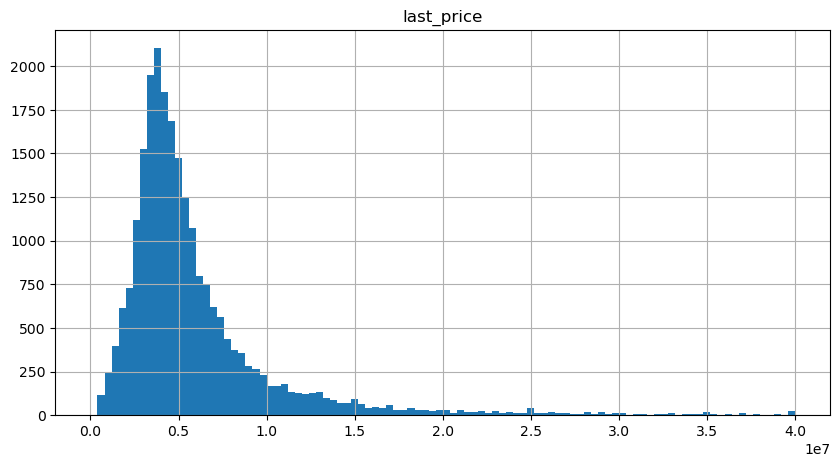

In [172]:
data.hist('last_price', bins=100, range=(0,40000000), figsize=(10,5))

data['last_price'].describe()

По стат данным видим, что максимум цены явно эксклюзивен либо абсолютно неадекватен (763М рублей), при этом даже верхняя(3-я) квартиль отмечается ценой 6.8М рублей, что уже довольно близко и к среднему (6.5М) и к медиане (4.8М). При этом минимум выглядит вполне адекватным по цене (1.2М).    
Будем считать, что "выбросов вниз" нет и сосредоточимся на "выбросах вверх".     
По гистограмме значений столбца "last_price" мы видим, что объявления с ценой более 25М рублей составляют очень малую долю всех объявлений и их отсутствие точно не ухудшит поиск закономерностей в выборке.  
Посмотрим точнее - сколько таких и что они из себя представляют.

In [173]:
display(data[data['last_price'] > 25000000]
        [
        ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
         'floor', 'floors_total', 'cityCenters_km', 'parks_nearest', 'locality_name']
].sort_values(by='last_price', ascending=True).head(20))

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest,locality_name
10193,25023000.0,253.70,200.00,33.0,6,2.65,2,4,12.0,103.0,Санкт-Петербург
3253,25092624.0,266.20,155.10,11.6,5,3.00,1,3,51.0,NaN,Санкт-Петербург
8948,25200000.0,157.40,NaN,40.3,3,2.65,5,5,149.0,NaN,Санкт-Петербург
18311,25200000.0,162.00,101.00,21.0,6,3.40,1,5,33.0,537.0,Санкт-Петербург
14131,25300000.0,153.00,86.10,19.4,4,3.05,9,17,85.0,441.0,Санкт-Петербург
15647,25398000.0,93.00,57.00,12.0,2,2.65,8,9,48.0,648.0,Санкт-Петербург
4302,25476800.0,160.00,NaN,NaN,2,2.65,5,10,NaN,NaN,Санкт-Петербург
18598,25490000.0,165.20,41.10,13.4,3,2.65,19,19,46.0,NaN,Санкт-Петербург
649,25500000.0,113.00,67.00,22.0,2,3.00,2,4,47.0,NaN,Санкт-Петербург
6175,25500000.0,149.30,86.00,32.0,4,2.80,15,18,81.0,NaN,Санкт-Петербург


In [174]:
data[data['last_price'] > 25000000]['last_price'].describe()

count    4.630000e+02
mean     5.350901e+07
std      5.612491e+07
min      2.502300e+07
25%      2.900000e+07
50%      3.675000e+07
75%      5.540000e+07
max      7.630000e+08
Name: last_price, dtype: float64

По срезу дорогих предложений видим, что это в подавляющем большинстве далеко не "массовые" предложения. Показательно, что уже первое предложение, превышающее по цене 25 миллионов рублей - это явно индивидуальное (если не сказать эксклюзивное) предложение: квартира общей площадью 250 кв. метров в чуть более 1 км от центра Санкт-Петербурга.
Это подтверждает, что уровень в 25М рублей - вполне адекватный уровень для того, чтобы исключить такие предложения из дальнейшего рассмотрения.
Характеристики предложений дороже 25 миллионов рублей показывают, что это набор, который насчитывает 463 предложения (из 23565 то есть менее 2%) со средней ценой 53.5 миллиона рублей и  медианой 36.75 миллиона, то есть заведомо индивидуальные предложения, которые на форе 23 тысяч предложений со средней ценой 6.54 миллиона рублей ( в 8 раз меньше ) выглядят явно "выбросами вверх" 

Попробуем их исключить из рассмотрения.


In [175]:
data = data.loc[data['last_price'] <= 25000000]

# Смотрим что осталось
data[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
     'floor', 'floors_total', 'cityCenters_km', 'parks_nearest']
].describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest
count,2.310200e+04,23102.000000,21296.000000,20932.000000,23102.000000,23102.000000,23102.000000,23102.000000,17613.000000,7701.000000
mean,5.598728e+06,57.583452,33.024836,10.243275,2.028093,2.717666,5.883733,10.725089,144.026174,493.897286
std,3.651818e+06,26.583893,17.732546,5.027987,1.010117,0.997276,4.887354,6.622803,85.886323,342.242295
min,1.219000e+04,12.000000,2.000000,1.300000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.400000e+06,40.000000,18.500000,7.000000,1.000000,2.600000,2.000000,5.000000,97.000000,290.000000
50%,4.600000e+06,51.185000,30.000000,9.000000,2.000000,2.650000,4.000000,9.000000,132.000000,456.000000
75%,6.580000e+06,68.000000,42.000000,11.700000,3.000000,2.700000,8.000000,16.000000,164.000000,614.000000
max,2.500000e+07,460.800000,279.600000,100.700000,14.000000,100.000000,33.000000,60.000000,660.000000,3190.000000


Видим, что выборка по прежнему весьма репрезенттативна (осталось 22861 запись, суммарные потери = 3.5%).

При этом после удаления "дорогих" предложений ожидаемо подровнялись и параметры самих квартир: напрмер средняя общая площадь снизилась с 60 кв.м. до 56 и приблизилась к медиане, а средняя жилая площадь снизилась с 34 до 32 кв.м.

Однако "выдающиеся" предложения убраны не все: максимум общей площади = 460 кв.м. что крайне далеко от "типичного". 

Ранее по гистограмме мы определяли, что квартиры больше 200 кв. метров общей площали не являются репрезентативными и составляют незначительную долю в выборке. 

Проверим это более подробно еще раз.

count    23102.000000
mean        57.583452
std         26.583893
min         12.000000
25%         40.000000
50%         51.185000
75%         68.000000
max        460.800000
Name: total_area, dtype: float64

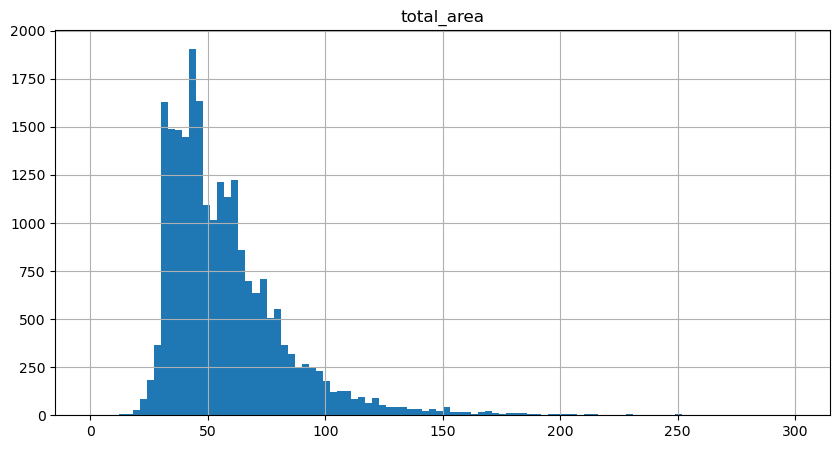

In [176]:
data.hist('total_area', bins=100, range=(0,300), figsize=(10,5))

data['total_area'].describe()

Предположение подтверждается: видно, что квартир с общей площадью больше 200 кв. метров крайне мало.
   
Взглянем чуть подробнее что это за предложения и какие их основные характеристики

In [177]:
display(data[data['total_area'] > 200]
        [
        ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
         'floor', 'floors_total', 'cityCenters_km', 'parks_nearest', 'locality_name']
].sort_values(by='total_area', ascending=False).head(20))

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest,locality_name
20160,20000000.0,460.8,279.6,55.50,6,3.10,1,3,155.0,852.0,Санкт-Петербург
862,25000000.0,363.0,222.0,16.60,14,3.16,4,5,80.0,NaN,Санкт-Петербург
11025,14000000.0,320.0,190.0,28.00,6,2.65,3,3,294.0,569.0,Красное Село
11368,24000000.0,316.3,187.0,NaN,8,2.65,5,5,51.0,NaN,Санкт-Петербург
9504,23500000.0,313.0,179.2,13.20,9,3.20,5,6,101.0,146.0,Санкт-Петербург
9515,24900000.0,312.0,127.0,24.00,5,3.00,2,2,117.0,287.0,Санкт-Петербург
13322,19500000.0,309.7,199.0,14.30,9,2.65,5,5,100.0,352.0,Санкт-Петербург
22113,19500000.0,287.5,183.7,26.00,7,2.65,3,4,47.0,578.0,Санкт-Петербург
4178,24900000.0,281.1,193.5,26.60,6,3.30,3,5,25.0,75.0,Санкт-Петербург
21563,22160000.0,277.6,211.0,17.80,7,3.80,3,6,57.0,375.0,Санкт-Петербург


In [178]:
data[data['total_area'] > 200]['total_area'].describe()

count     68.000000
mean     240.022941
std       43.890760
min      201.000000
25%      211.000000
50%      230.000000
75%      250.000000
max      460.800000
Name: total_area, dtype: float64

По срезу больших квартир видим:
Предложений квартир с общей площадью больше 200 кв. метров  - всего 42, что ничтожно мало на фоне 23 тысяч предложений в выборке.
Ошибок или описок в их параметрах не видно.     
Начиная хоть и не с первой, но со второй точно все эти предложения - индивидуальные, все дороже 11 М рублей, что существенно выше не только медианы, но и среднего по выборке.
Это подтверждает, что уровень в 200 кв. метров - вполне адекватный уровень для того, чтобы исключить такие предложения из дальнейшего рассмотрения.
Характеристики предложений квартир больше 200 метров общей площади рублей показывают, что это набор из как было сказано всего 42 квартир, со средней площадью 234 кв. метра, медианой - 223 кв. метра и максимумом аж 460 метров. Как и в случае с предложениями дороже 25М рублей - все эти предложения далеки от массовости ( в 4 раза больше и в 2 раза дороже чем в среднем по выборке ) и выглядят явно "выбросами вверх" 

Попробуем их исключить из рассмотрения.


In [179]:
data = data.loc[data['total_area'] <= 200]

# Смотрим много ли "ушло" и что осталось
data[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
     'floor', 'floors_total', 'cityCenters_km', 'parks_nearest']
].describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest
count,2.303400e+04,23034.000000,21235.000000,20872.000000,23034.000000,23034.000000,23034.000000,23034.000000,17547.000000,7661.000000
mean,5.559174e+06,57.044862,32.693177,10.201253,2.015933,2.716805,5.887688,10.737866,144.217017,494.240700
std,3.576931e+06,24.589259,16.526808,4.911739,0.980626,0.998400,4.890031,6.624667,85.854023,342.593014
min,1.219000e+04,12.000000,2.000000,1.300000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.400000e+06,40.000000,18.500000,7.000000,1.000000,2.600000,2.000000,5.000000,97.000000,290.000000
50%,4.590000e+06,51.000000,30.000000,9.000000,2.000000,2.650000,4.000000,9.000000,132.000000,456.000000
75%,6.500000e+06,67.800000,41.800000,11.700000,3.000000,2.700000,8.000000,16.000000,164.000000,614.000000
max,2.500000e+07,200.000000,164.700000,65.000000,11.000000,100.000000,33.000000,60.000000,660.000000,3190.000000


Видим, что в общей сложности "ушло" совсем немного объявлений (суммарные потери = 3.7%), а при этом сама выборка выглядит более-менее адекватно.
По общей площади предложения видятся уже довольно ровными: отличия среднего от медианы всего 5 кв. метров, а верхняя квартиль на уровне 67 "квадратов" - вполне репрезентативно.

Однако все-таки жилая площадь в 160 кв.м. и особенно площадь кухни 64 кв.м. в максимуме - это многовато. 

Посмотрим повнимательнее на эти параметры.

count    21235.000000
mean        32.693177
std         16.526808
min          2.000000
25%         18.500000
50%         30.000000
75%         41.800000
max        164.700000
Name: living_area, dtype: float64

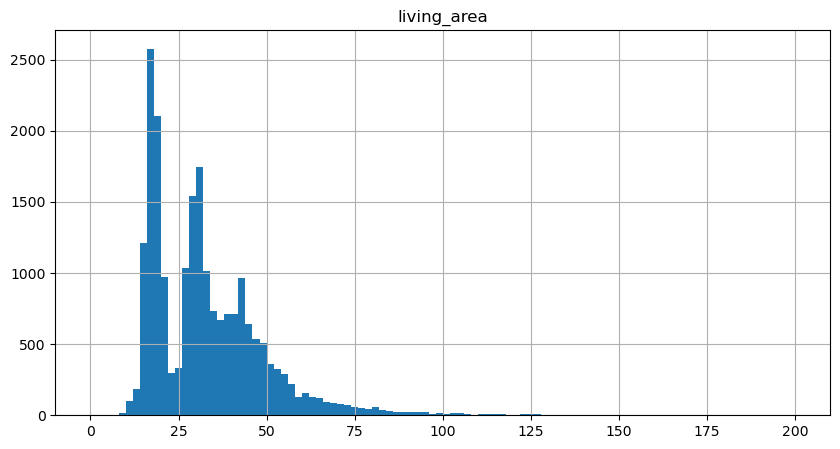

In [180]:
data.hist('living_area', bins=100, range=(0,200), figsize=(10,5))

data['living_area'].describe()

Из статистических параметров видим, что "характерные" параметры жилой площади - это 30-40 метров (медиана 30, среднее 32, верхний квартиль - 41кв.м.). Тем не менее максимум составляет аж 160 кв.м. что очень сильно отличается от средних показателей.

При рассмотрении гистограммы мы видим, что нетипичные объявления в этой выборке (выбросы или хвосты) - это предложения с жилой площадью более 100 кв.м. может считаться нетипичной

Взглянем на основные характеристики этих больших жилых помещений.

In [181]:
display(data[data['living_area'] > 100]
        [
        ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
         'floor', 'floors_total', 'cityCenters_km', 'parks_nearest', 'locality_name']
].sort_values(by='living_area', ascending=False).head(20))

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest,locality_name
21554,23600000.0,181.3,164.7,10.7,4,3.50,7,7,56.0,484.0,Санкт-Петербург
22774,19500000.0,190.0,159.6,21.0,6,2.65,3,4,8.0,NaN,Санкт-Петербург
9347,19500000.0,195.7,150.8,17.7,6,3.21,5,5,42.0,500.0,Санкт-Петербург
11732,20295200.0,192.3,147.2,17.8,6,2.95,1,2,NaN,NaN,Бор
18687,15000000.0,197.2,145.4,17.5,5,3.78,3,5,42.0,634.0,Санкт-Петербург
16110,19000000.0,189.0,145.0,NaN,6,3.23,2,6,30.0,73.0,Санкт-Петербург
22295,25000000.0,196.0,145.0,17.0,7,3.50,5,6,37.0,552.0,Санкт-Петербург
4687,18000000.0,184.0,142.0,15.0,5,2.65,5,7,43.0,556.0,Санкт-Петербург
12478,14500000.0,165.0,140.0,19.0,6,2.65,4,6,18.0,427.0,Санкт-Петербург
12496,22000000.0,180.6,140.0,30.0,5,2.80,2,7,50.0,NaN,Санкт-Петербург


In [182]:
data[data['living_area'] > 100]['living_area'].describe()

count    123.000000
mean     116.167317
std       13.217152
min      100.400000
25%      105.150000
50%      112.400000
75%      123.300000
max      164.700000
Name: living_area, dtype: float64

Видим:

Всего предложений квартир с жилой площадью больше 100 кв. метров - 72. Ошибок или описок в их параметрах не видно.
Что на взгляд это предложения многокомнатных кватрир (5-7 комнат, хотя есть предложение и 11-комнатной кватриры) либо в старых домах с высокими потолками близко к центру Санкт-Петербурга (таких большинство), либо просторных квартир на дальше от центра, но с хорошими параметрами - очень похоже, что в современных элитных жилых комплексах.

Разброс параметров жилых помещений не так велик, но они существенно отличаются от "основной" группы в выборке и выглядят если и не выбросами, то искажающими картину - точно.

Попробуем их удалить.

In [183]:
data = data.loc[(data['living_area'] <= 100)]

# Смотрим что осталось
data[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
     'floor', 'floors_total', 'cityCenters_km', 'parks_nearest']
].describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest
count,2.111200e+04,21112.000000,21112.000000,20335.000000,21112.000000,21112.000000,21112.000000,21112.000000,16240.000000,7058.000000
mean,5.499076e+06,56.363092,32.206851,10.117075,1.999053,2.717940,5.896552,10.731622,145.238608,492.348541
std,3.430566e+06,23.091905,15.260508,4.814051,0.949334,1.040574,4.878603,6.599951,86.308829,340.625424
min,1.219000e+04,12.000000,2.000000,1.300000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.400000e+06,40.000000,18.500000,7.000000,1.000000,2.600000,2.000000,5.000000,99.000000,289.000000
50%,4.590000e+06,51.000000,30.000000,9.000000,2.000000,2.650000,4.000000,9.000000,133.000000,456.000000
75%,6.500000e+06,67.200000,41.300000,11.500000,3.000000,2.700000,8.000000,16.000000,164.000000,613.000000
max,2.500000e+07,200.000000,100.000000,65.000000,7.000000,100.000000,33.000000,60.000000,660.000000,3190.000000


Видим, что в выборке осталось 21112 объявлений, то есть в общей сложности "ушло" = 10.9%), а при этом сама выборка выглядит уже достаточно "характерной".
По жилой площади выборка довольно ровная: отличия среднего от медианы всего 2 кв. метра, что вполне неплохо.

Тем не менее нужно посмотреть на параметр площади кухни - 64 кв.м. в максимуме - это многовато. 

Посмотрим повнимательнее что с кухнями.

In [184]:
data['kitchen_area'].describe()

count    20335.000000
mean        10.117075
std          4.814051
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         65.000000
Name: kitchen_area, dtype: float64

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

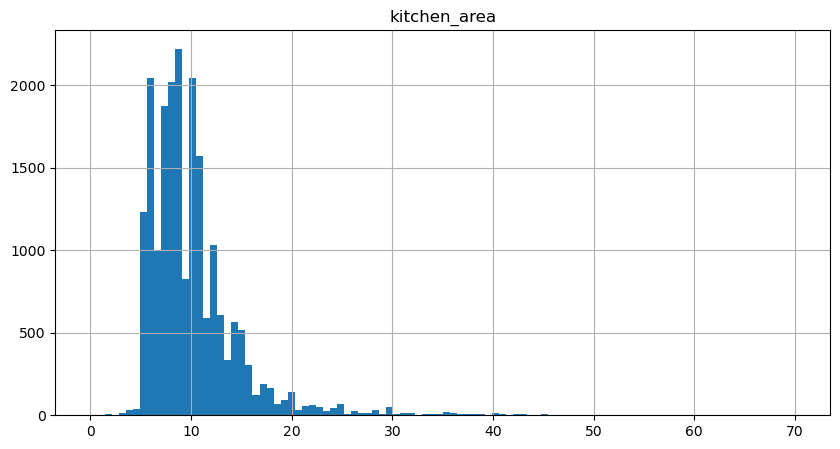

In [185]:
data.hist('kitchen_area', bins=100, range=(0,70), figsize=(10,5))

Видно, что статистические параметры более-менее ровные: среднее больше медианы на 10%, что соответствует аналогичным разбросам для общей и жилой площадей.    
Однако максимальные значения тем не менее довольно велики и сильно отличаются от даже верхнего квартиля.      
Кроме того из гистограммы видно, что кухни больше уже 20 кв. метров являются крайне нетипичными, а больше 30 кв. метров (что в три раза больше даже вернего квартиля) - можно смело считать выбросами.

Взглянем на основные характеристики этих больших жилых помещений.

In [186]:
display(data[data['kitchen_area'] > 30]
        [
        ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
         'floor', 'floors_total', 'cityCenters_km', 'parks_nearest', 'locality_name']
].sort_values(by='kitchen_area', ascending=False).head(20))

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest,locality_name
22849,24500000.0,155.4,72.0,65.0,3,3.00,2,4,155.0,756.0,Санкт-Петербург
19390,8000000.0,118.0,36.0,64.0,3,3.00,4,5,308.0,569.0,Пушкин
15693,12990000.0,119.6,36.4,64.0,3,3.00,4,5,308.0,569.0,Пушкин
3546,12300000.0,115.0,45.0,60.0,3,2.70,16,20,142.0,NaN,Санкт-Петербург
20754,21500000.0,140.0,70.0,58.0,4,3.00,3,4,132.0,NaN,Санкт-Петербург
4299,19700000.0,146.3,55.8,56.2,3,3.40,6,6,24.0,548.0,Санкт-Петербург
16867,16500000.0,101.3,32.9,55.7,3,2.80,10,18,81.0,NaN,Санкт-Петербург
17464,24500000.0,167.5,83.6,54.2,3,2.65,6,6,23.0,305.0,Санкт-Петербург
20385,20950000.0,152.0,70.0,53.0,4,3.30,4,4,43.0,633.0,Санкт-Петербург
8666,24500000.0,105.0,31.1,51.0,2,3.20,2,6,33.0,445.0,Санкт-Петербург


In [187]:
data[data['kitchen_area'] > 30]['kitchen_area'].describe()

count    184.000000
mean      38.701630
std        6.934312
min       30.200000
25%       34.000000
50%       36.350000
75%       42.400000
max       65.000000
Name: kitchen_area, dtype: float64

Видим:

Всего предложений квартир с кухней больше 30 кв. метров - 184, что конечно заметно, но все-таки составляет менее 1% от выборки. 

Очень похоже, что в большинстве своем это предложения элитных квартир ближе к окраинам: просторные не только по площади кухни (общей площадью 140-160 кв.м.), в домах с этажностью 10, 12, 16 этажей, с потолками от2.65 до 2.80. И с изрядной "примесью" старых квартир в центре города.

Ошибок или описок в описании параметров не найдено, исправлять нечего.    
Попробуем их удалить.

In [188]:
data = data.loc[(data['kitchen_area'] <= 30)]

# Смотрим что осталось
data[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
     'floor', 'floors_total', 'cityCenters_km', 'parks_nearest']
].describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest
count,2.015100e+04,20151.000000,20151.000000,20151.000000,20151.000000,20151.000000,20151.000000,20151.000000,15528.000000,6738.000000
mean,5.446599e+06,56.323072,32.268369,9.856068,2.016624,2.711631,5.848792,10.642747,145.792246,492.162066
std,3.279351e+06,22.232123,15.124192,3.926925,0.931378,1.009865,4.834667,6.552809,86.303985,338.264100
min,4.300000e+05,14.000000,2.000000,1.300000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.450000e+06,40.000000,18.500000,7.000000,1.000000,2.600000,2.000000,5.000000,100.000000,289.250000
50%,4.600000e+06,51.000000,30.000000,9.000000,2.000000,2.650000,4.000000,9.000000,133.000000,456.000000
75%,6.499000e+06,67.000000,41.400000,11.400000,3.000000,2.700000,8.000000,15.000000,164.000000,613.750000
max,2.500000e+07,197.000000,100.000000,30.000000,7.000000,100.000000,33.000000,60.000000,660.000000,3190.000000


Видим, что в выборке осталось 20335 объявлений, то есть в общей сложности "ушло" = 14.2%), а при этом сама выборка выглядит уже практически хорошо.
По площади кухни выборка стала ровнее: отличия среднего от медианы меньше, чам на 1 кв. метр, а от верхнего квартиля 1.6 кв.м. 


Из параметров "квартира в доме" - осталось посмотреть количество комнат, высоту потолков, этаж кватриры и этажность дома.
Теперь посмотрим на количество комнат:  


Относительно количества комнат: навскидку максимум в 7 комнат не выглядят какой-то фантастикой для жилого форда Питера с обилием исторических домов.
Тем не менее на фоне  2-х в среднем выглядит несколько многовато.
Есть смысл посмтреть на квартиры с 6 и 7-ю комнатами, проверить нет ли там каких-то видимых нестыковок, ошибок и т.д., поститать сколько их и если мало - все-таки убрать из рассмотрения.

In [189]:
display(data[data['rooms'] > 5]
        [
        ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
         'floor', 'floors_total', 'cityCenters_km', 'parks_nearest', 'locality_name']
].sort_values(by='rooms', ascending=False).head(20))

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest,locality_name
23423,15350000.0,158.5,57.4,12.4,7,2.95,7,7,31.0,347.0,Санкт-Петербург
851,15000000.0,134.0,88.0,12.0,7,2.65,3,4,39.0,803.0,Санкт-Петербург
22139,22000000.0,141.0,84.0,25.0,7,2.65,2,5,33.0,447.0,Санкт-Петербург
17889,12000000.0,125.0,82.0,24.0,7,3.30,5,6,53.0,407.0,Санкт-Петербург
15110,24000000.0,135.0,75.1,20.7,7,3.00,1,5,48.0,NaN,Санкт-Петербург
14426,6864000.0,95.0,75.0,13.0,6,2.50,3,15,107.0,NaN,Санкт-Петербург
22916,10500000.0,110.0,75.0,11.0,6,3.20,6,7,44.0,NaN,Санкт-Петербург
21997,8500000.0,128.3,81.9,8.4,6,2.65,2,9,NaN,NaN,Сосновый Бор
21100,9000000.0,125.7,73.6,10.9,6,2.55,15,15,127.0,NaN,Санкт-Петербург
20147,9500000.0,135.0,90.0,15.0,6,2.70,1,12,168.0,NaN,Санкт-Петербург


In [190]:
data[data['rooms'] > 5]['rooms'].describe()

count    24.000000
mean      6.208333
std       0.414851
min       6.000000
25%       6.000000
50%       6.000000
75%       6.000000
max       7.000000
Name: rooms, dtype: float64

Ошибок и явных нестыковок не видно: квартиры с 6 и 7-ю комнатами продолжают оставаться "пропорциональными" и с явным налетом все той же "эксклюзивности", которую мы видели в квартирах с большой жилой площадью.

Поскольку их всего 24 на всю выборку - кажется есть смысл их убрать из рассмотрения.    
Попробуем их удалить.

In [191]:
data = data.loc[(data['rooms'] <= 5)]

# Смотрим что осталось
data[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
     'floor', 'floors_total', 'cityCenters_km', 'parks_nearest']
].describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest
count,2.012700e+04,20127.000000,20127.000000,20127.000000,20127.000000,20127.000000,20127.000000,20127.000000,15505.000000,6723.000000
mean,5.437243e+06,56.240857,32.208173,9.851216,2.011626,2.711362,5.851940,10.647339,145.901258,492.276216
std,3.265339e+06,22.108998,15.028376,3.922653,0.920503,1.010372,4.835682,6.553978,86.278740,338.543322
min,4.300000e+05,14.000000,2.000000,1.300000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.450000e+06,40.000000,18.500000,7.000000,1.000000,2.600000,2.000000,5.000000,100.000000,289.000000
50%,4.600000e+06,51.000000,30.000000,9.000000,2.000000,2.650000,4.000000,9.000000,133.000000,456.000000
75%,6.490000e+06,67.000000,41.300000,11.400000,3.000000,2.700000,8.000000,15.000000,164.000000,614.000000
max,2.500000e+07,197.000000,100.000000,30.000000,5.000000,100.000000,33.000000,60.000000,660.000000,3190.000000


Параметры столбца "rooms" подравнялись, для остальных параметров фактически ничего не поменялось.


Разберемся теперь с потолком в 100 метров

In [192]:
data[data['ceiling_height'] > 5]['ceiling_height'].describe()

count     23.000000
mean      26.495652
std       17.467437
min        8.000000
25%       23.300000
50%       25.000000
75%       27.000000
max      100.000000
Name: ceiling_height, dtype: float64

Ситуация со столбцом "ceiling_height" выглядит странновато.
Предположение о том, что все значения сосредоточены в диапазоне до 7-10 метром максимум и только пара-тройка явных "ошибок" выбивается - это предположение неверно. Если поиграть с высотой потолка и посмотреть в скольких предложениях она превышается, то получим что с потолком выше 5 метров есть 23 предложений, с потолком выше 20 метров их 18, с высотой больше 23.95 метров их 17, а вот выше 32 метров - только одно: то самое 100 метровое (что делать с ним - непонятно, на ошибку не похоже совсем: нужно просто удалять).
Есть подозрение, что в в подавляющем большинстве высота потолков в диапазоне от 24 до 32 метров - это просто ошибочное дописывание нолика при заполнении параметров квартиры.

Квартир с высотой потолка больше 5 метров всего 23, можно было бы их просто удалить, но есть предложение в этом случае потренироваться быть бережливым.      
А именно - попробовать сначала убрать нолик у параметра "ceiling_height" для высот потолков больше 23.95 м. (на самом деле лежащих в диапазоне от 23.95 до 32 метров). Это даст реальные высоты потолка от 2.4 до 3.2 метров, что вполне соответствует действительности и даже составляет норму.     
А уже затем удалить все оставшиеся предложения с потолками выше 5 метров (их должно быть всего 7)


In [193]:
display(data[data['ceiling_height'] > 5]
        [
        ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
         'floor', 'floors_total', 'cityCenters_nearest', 'parks_nearest', 'locality_name']
].sort_values(by='ceiling_height', ascending=False).head(25))

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,parks_nearest,locality_name
22739,15000000.0,25.0,14.0,11.0,1,100.0,5,5,8283.0,223.0,Санкт-Петербург
3134,2900000.0,75.0,53.0,8.0,3,32.0,2,3,NaN,NaN,Волхов
22211,9999000.0,92.4,55.5,16.5,2,32.0,5,6,3506.0,NaN,Санкт-Петербург
21256,4900000.0,42.0,37.7,11.0,1,27.5,19,24,9760.0,NaN,Санкт-Петербург
10713,3800000.0,58.0,30.1,8.1,2,27.0,3,10,NaN,NaN,Мурино
21700,2450000.0,44.0,38.0,8.6,2,27.0,2,2,NaN,NaN,Большая Ижора
20364,8000000.0,45.0,22.0,10.0,1,27.0,2,4,3246.0,NaN,Санкт-Петербург
22807,4000000.0,98.0,73.0,9.0,4,27.0,2,2,NaN,NaN,Нижняя
5777,8150000.0,80.0,41.0,12.0,2,27.0,13,36,20444.0,NaN,Санкт-Петербург
5219,2500000.0,54.0,30.0,9.0,2,27.0,3,5,NaN,NaN,Мины


In [194]:
data['ceiling_height'].describe()

count    20127.000000
mean         2.711362
std          1.010372
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [195]:
# убираем нолик
data.loc[(data['ceiling_height'] > 23.95), 'ceiling_height'] /= 10

# удаляем потолки выше 5 м
data = data.loc[(data['ceiling_height'] <= 5)]

# Смотрим что осталось
data[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
     'floor', 'floors_total', 'cityCenters_km', 'parks_nearest']
].describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest
count,2.012000e+04,20120.000000,20120.000000,20120.000000,20120.000000,20120.000000,20120.000000,20120.000000,15499.000000,6720.000000
mean,5.436854e+06,56.241721,32.208931,9.851229,2.011680,2.684147,5.851392,10.646720,145.911672,492.211310
std,3.265072e+06,22.109175,15.028824,3.923153,0.920528,0.200424,4.835500,6.554421,86.292747,338.541718
min,4.300000e+05,14.000000,2.000000,1.300000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.450000e+06,40.000000,18.500000,7.000000,1.000000,2.600000,2.000000,5.000000,100.000000,289.000000
50%,4.600000e+06,51.000000,30.000000,9.000000,2.000000,2.650000,4.000000,9.000000,133.000000,456.000000
75%,6.490000e+06,67.000000,41.300000,11.400000,3.000000,2.700000,8.000000,15.000000,164.000000,614.000000
max,2.500000e+07,197.000000,100.000000,30.000000,5.000000,4.800000,33.000000,60.000000,660.000000,3190.000000


In [196]:
data.loc[(data['ceiling_height'] > 23.95), 'ceiling_height'] /= 10

In [197]:
data = data.loc[(data['ceiling_height'] <= 5)]
display(data[data['ceiling_height'] > 1]
        [
        ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
         'floor', 'floors_total', 'cityCenters_nearest', 'parks_nearest', 'locality_name']
].sort_values(by='ceiling_height', ascending=False).head(25))

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,parks_nearest,locality_name
2791,14950000.0,50.0,30.0,10.0,2,4.80,2,3,1725.0,589.0,Санкт-Петербург
19035,8650000.0,87.7,57.4,25.0,2,4.70,26,26,9888.0,1248.0,Санкт-Петербург
6767,7500000.0,69.0,64.0,25.0,2,4.50,3,3,15610.0,NaN,Санкт-Петербург
3053,6600000.0,95.0,45.0,25.0,2,4.50,7,7,NaN,NaN,Выборг
10106,11500000.0,85.6,63.0,12.0,3,4.50,3,3,16170.0,NaN,Санкт-Петербург
14435,17600000.0,112.0,83.0,10.0,4,4.50,2,4,1645.0,276.0,Санкт-Петербург
2812,2700000.0,39.0,18.3,8.4,1,4.50,6,6,NaN,NaN,Токсово
11583,8500000.0,135.0,61.5,16.0,3,4.40,3,5,4840.0,NaN,Санкт-Петербург
4180,8250000.0,84.2,52.0,15.0,2,4.37,3,3,4527.0,342.0,Санкт-Петербург
10694,9350000.0,74.0,46.0,10.0,3,4.30,2,4,2417.0,538.0,Санкт-Петербург


Столбец с высотой потолков приведен в порядок.     
Из выборки действительно ушло 7 строк, осталось 20120 предложений. На остальные параметры удаленные кватриры практически не повлияли.

Из параметров "квартира в доме" - осталось посмотреть этаж и этажность дома.

Займемся этажем.

In [198]:
data['floor'].describe()

count    20120.000000
mean         5.851392
std          4.835500
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Видим, что разница между средним и медианой в 2 этажа (по идее должен бы быть 1) - это стоит посмотреть.
Кроме того максимум в 4 раза выше верхнего квартиля - на мой взгляд многовато.
Это похоже на "хвост" из относительно небольшого числа "высотных" кватрир.
Посмотрим количество по этажам (аналог в цифрах)

array([[<Axes: title={'center': 'floor'}>]], dtype=object)

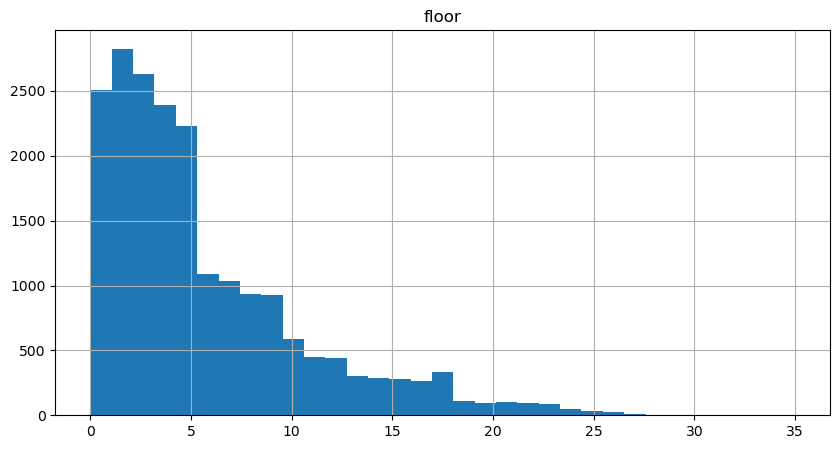

In [199]:
data.hist('floor', bins=33, range=(0,35), figsize=(10,5))

На взгдяд - действительно все что выше 25 этажа хоть и не выбросы как таковые (поскольку отрыва нет) но точно "хвост"

In [200]:
data.loc[data['floor'] > 25 ,'floor'].value_counts()

floor
26    22
27     8
28     1
30     1
29     1
32     1
33     1
31     1
Name: count, dtype: int64

Возможно есть смысл убрать предложение с этажами 28-33 по одному на этаж.

In [201]:
data = data.loc[(data['floor'] <= 27)]

# Смотрим что осталось
data[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
     'floor', 'floors_total', 'cityCenters_km', 'parks_nearest']
].describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest
count,2.011400e+04,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,15493.000000,6720.000000
mean,5.435948e+06,56.235678,32.207443,9.849375,2.011634,2.684147,5.844039,10.639455,145.889176,492.211310
std,3.264976e+06,22.107205,15.029099,3.921847,0.920584,0.200452,4.817351,6.541863,86.301882,338.541718
min,4.300000e+05,14.000000,2.000000,1.300000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.450000e+06,40.000000,18.500000,7.000000,1.000000,2.600000,2.000000,5.000000,100.000000,289.000000
50%,4.600000e+06,51.000000,30.000000,9.000000,2.000000,2.650000,4.000000,9.000000,133.000000,456.000000
75%,6.490000e+06,67.000000,41.300000,11.400000,3.000000,2.700000,8.000000,15.000000,164.000000,614.000000
max,2.500000e+07,197.000000,100.000000,30.000000,5.000000,4.800000,27.000000,60.000000,660.000000,3190.000000


Ну и осталось посмотреть где в Питере есть дом в 60 этажей и не ошибка ли это.

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

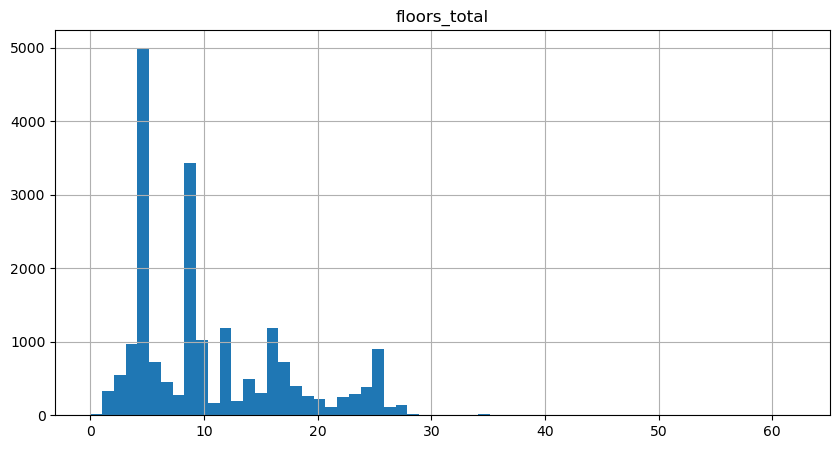

In [202]:
data.hist('floors_total', bins=60, range=(0,62), figsize=(10,5))

Судя по гистограмме - все что выше 28 этажа - это статистический шум.

In [203]:
data.loc[data['floors_total'] > 25, ['floors_total']].value_counts()

floors_total
27              146
26              110
28               20
35               19
29                1
36                1
37                1
52                1
60                1
Name: count, dtype: int64

Вывод из гистограммы частично подтверждается: есть всплеск на 35 этаже, а все что выше - это эксклюзив.    
При ошибка может быть только в последнем случае с 60-м этажом (просто лишний нолик), в остальных случаях этажи не кратны 10 и по всей видимости этажи указаны подлииные (но совершенно не характерные для региона)

Давайте просто удалим всё, что выше 35 этажа

In [204]:
data = data.loc[(data['floors_total'] <= 35)]

# Смотрим что осталось
data[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', \
     'floor', 'floors_total', 'cityCenters_km', 'parks_nearest']
].describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,cityCenters_km,parks_nearest
count,2.011000e+04,20110.000000,20110.000000,20110.000000,20110.000000,20110.000000,20110.000000,20110.000000,15489.000000,6718.000000
mean,5.436033e+06,56.236645,32.209060,9.849258,2.011735,2.684185,5.843212,10.632372,145.860159,492.188896
std,3.265194e+06,22.108046,15.029285,3.922046,0.920621,0.200359,4.816782,6.521630,86.264801,338.567262
min,4.300000e+05,14.000000,2.000000,1.300000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.450000e+06,40.000000,18.500000,7.000000,1.000000,2.600000,2.000000,5.000000,100.000000,289.000000
50%,4.600000e+06,51.000000,30.000000,9.000000,2.000000,2.650000,4.000000,9.000000,133.000000,456.000000
75%,6.490000e+06,67.000000,41.300000,11.400000,3.000000,2.700000,8.000000,15.000000,164.000000,614.000000
max,2.500000e+07,197.000000,100.000000,30.000000,5.000000,4.800000,27.000000,35.000000,660.000000,3190.000000


В результате нашей обработки параметры квартир выглядят более адекватными и пригодными для анализа.
Записей осталось 20110, что более чем достаточно для репрезентативного анализа.
Попутно отметим, что  если сейчас взглянуть на data.info() - то мы увидим ... 

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20110 entries, 0 to 23564
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           20110 non-null  int64         
 1   last_price             20110 non-null  float64       
 2   total_area             20110 non-null  float64       
 3   first_day_exposition   20110 non-null  datetime64[ns]
 4   rooms                  20110 non-null  int64         
 5   ceiling_height         20110 non-null  float64       
 6   floors_total           20110 non-null  int64         
 7   living_area            20110 non-null  float64       
 8   floor                  20110 non-null  int64         
 9   is_apartment           20110 non-null  bool          
 10  studio                 20110 non-null  bool          
 11  open_plan              20110 non-null  bool          
 12  kitchen_area           20110 non-null  float64       
 13  balcon

... что задача по заполнению пропусков в столбцах "living_area" и "kitchen_area" в процессе чистки решилась сама собой: пропуски в данных о жилой площади и площади кухни были в объявлениях, которые мы удалили в процессе "чистки" (по абсолютно другим соображениям).

Прежде чем перейти к работе с гео-данными отметим, что мы проанализировли на наличие "выбросов" и "хвостов" все параметры, кроме:     
количества фотографий  - за ненадобностью на наш взгляд такого анализа,      
и парметр количества дней экспозиции объявления - потому что в следующем задании мы отдельно будем рассматривать этот параметр. 

Теперь посмотрим на геолокационные данные, а именно на расстояние (в км.) до центра города и расстояние до ближайшего парка.

Максимальное значение в расстоянии до центра города выглядит так, что это уже другой регион (расстояние до Москвы столько же - 650 км.)

array([[<Axes: title={'center': 'cityCenters_km'}>]], dtype=object)

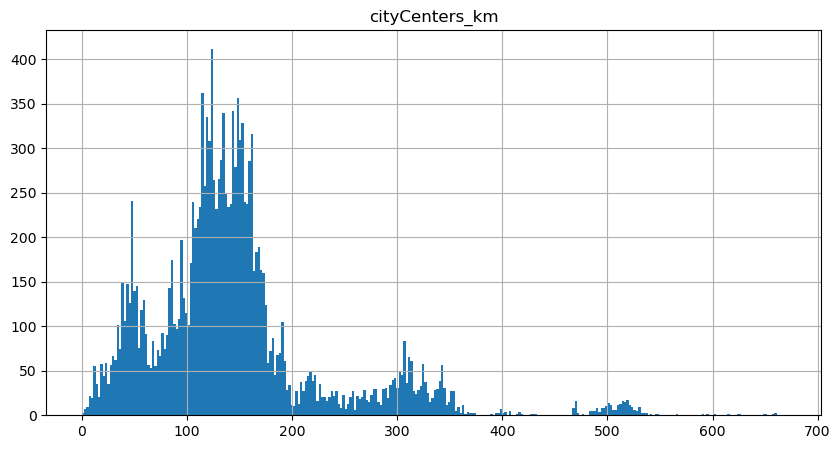

In [206]:
data.hist('cityCenters_km', bins=300, range=(0,670), figsize=(10,5))

Гистограмма выглядит крайне неперспективно: 

Есть три отчетливые зоны:      
Основная - от 2 до где-то 250 км с максимумом на 130 км - это точно Питер и область и по ней вопросов вроде бы не возникает.       
Существенно меньшая зона на расстояниях от примерно 250 до 380 км с максимумом на 310 км. - это по расстоянию где-то на границе Ленинградской области, но может быть и Новгородская область (до Великого Новгорода меньше 200 км.) и Псковская (до Пскова около 300 км.) и даже Финляндия (она там рядом совсем). То есть достоверность привязки этой зоны к Питеру низкая.      
Ну и третья - на гистограмме незначительная область на расстояниях 450 - 550 км. Это уже заведомо не Питер, не Ленобласть и возможно даже не Россия (Белорусия или та же Финляндия, включая Хельсинки - там около 400 км. как раз). То есть либо здесь какая-то ошибка с определением расстояний, либо эта зона отношения к Питеру не имеет, попала в датасет случайно и рассматривать ее нельзя.

При этом из того, что в столбце "locality_name" значится какое-нибудь "Первомайское" или "Лаврики" без проверки геолокации никак не проверишь - имеет ли это какое-либо отношение к Питеру или нет. В идеале было бы конечно иметь справочный датасет с городами Ленинградской области и их основными параметрами (включая расстояние до Питера), но такого стравочника у нас нет.

Нельзя так-же исключать возможность ошибки гнолокационного позиционирования (Алексеевок, Андреевок и Медвежих Углов у нас по стране немало и как алгоритм выбирал позиционировние конкретного объекта мы без обсуждения с разработчиками не знаем). 

А без более-менее адекватной привязки предложения к региону (тем более столичному региону) пытаться анализировать зависимость его цены от каких-то параметров - это мерять "среднее по больнице".

А если еще учесть, что по данному параметру (расстояние до центра города) у нас была масса пропусков, которые мы не смогли пока заполнить чем-либо адекватным - ситуация может сложиться так, что собственно анализ нам придется делать по выборке размером меньше половины изначальной.

Нужно еще проверить статистические данные: может там есть какая-то подсказка.

In [207]:
data['cityCenters_km'].describe()

count    15489.000000
mean       145.860159
std         86.264801
min          2.000000
25%        100.000000
50%        133.000000
75%        164.000000
max        660.000000
Name: cityCenters_km, dtype: float64

Статистические параметры так-же выглядят удручающе странно:

Сраднее и медиана - примерно на середине Ленинградской области (145 и 133 километра от центра города).

При этом когда мы после удаления неявных дубликатов в столбце "locality_name" пытались убрать пропуски в геолокационных столбцах ( и даже в процессе создавали некий путеводитель по Питеру и окресностям) мы попутно выяснили, что название "Санкт-Петербург" в столбце "locality_name" фигурирует в двух третях записей (66%). то есть получается, что в 66% случаев объект продается в Питере (размеры Питера врят-ли превышают 100 км. то есть максимальное для города расстояние до центра - не более 50 км.), а при этом медиана расстояния до центра города 133 км. 

Варианта при этом может быть три:       
Либо люди, писавшие объявления грубо говоря "врут", когда заявляют что кватрира в Питере, но этот вариант нужно отбросить сразу, потому что в этом нет ни малейшего смысла (с точностью до малого процента ошибок): если написать что это Питер, а на самом деле нет - это во-первых легко раскрывается прямо сразу же (он должны заполнять адрес, в описании писать район и т.д) а во-вторых в этом нет смысла потому что попадаешь ровно мимо своей аудитории, которой ты хочешь этот объект продать.        
Либо что-то в алгоритмах геолокации работает не так и геолокационные данные ошибочны (то есть не только расстояние до центра города, но и остальные: алгоритм то тот же) и их все нужно исключить из рассмотрения,             
Либо нужно признать, что все (ну или подавляющее большинство) 4622 строки, в которых геопозиция не указана - это объявления из Санкт-Петербурга.

Эту гипотезу нужно проверить прежде всего, потому что      
Если объявлений у которых значится "Санкт_Петербург" в столбце "locality_name"  и "NaN" в столбце "cityCenters_nearest" немного - то значит алгоритм геолокации кривой (в смысле работает некорректно), гео-данные недостоверны и делать с ними что-то осмысленное невозможно.     
Если же таких объявлений много - то можно будет заполнить пропуски в солбце "cityCenters_nearest" медианными данными именно по Питеру       
и это может несколько прояснить ситуацию и даст возможность исключить из рассмотрения "зону300" и "зону500" и при этом не ухудшит выборку безнадежно.

Проверяем:

In [208]:
data.loc[ (data['locality_name'] == 'Санкт-Петербург'), 
         ['locality_name']].value_counts()

locality_name  
Санкт-Петербург    13287
Name: count, dtype: int64

In [209]:
print(data['locality_name'].value_counts(normalize=True, ascending=False).head(5))

locality_name
Санкт-Петербург    0.660716
Мурино             0.022775
Шушары             0.019393
Кудрово            0.018598
Всеволожск         0.017703
Name: proportion, dtype: float64


То есть с распределением в столбце "locality_name" все так, как мы и констатировали выше: 66% объявлений заявляют, что они из самого Питера. Как условились - будем считать это правдой.

In [210]:
data.loc[ (data['locality_name'] == 'Санкт-Петербург') & 
         (data['cityCenters_nearest'].isna()), 
         ['locality_name']].value_counts()

locality_name  
Санкт-Петербург    35
Name: count, dtype: int64

Пересечений значений "Санкт_Петербург" в столбце "locality_name" и "NaN" в столбце "cityCenters_nearest" очень мало.     
Напрашивается вывод, что есть проблемы с геоданными.     
Посмотрим напрямую: много ли объявлений в которых заявлено "Санкт_Петербург", а расстояние от центра города больше границ города. При этом возьмем границы с запасом - напрмер 100 км. 

In [211]:
data.loc[ (data['locality_name'] == 'Санкт-Петербург') & 
         (data['cityCenters_nearest'] > 100), 
         ['locality_name']].value_counts()

locality_name  
Санкт-Петербург    13252
Name: count, dtype: int64

Вывод подтверждается: с геоданными явно что-то не так, по всей видимости по причине некорректной работы алгоритмов.     

Вывод:

В дальнейшем анализе гео-данные, полученные с помощью этих алгоритмов, а именно содержащиеся в столбцах с расстояниями: 'airports_nearest', 'cityCenters_nearest', 'parks_nearest' и 'ponds_nearest' игнорируем.       

Пишем разработчикам (ну или тем, от кого получили исходный датафрейм) сообщение об ощибке (bag report) примерно следующего содержания:



Уважаемые коллеги,      
Хотелось бы проинформировать вас о возможной проблеме, выявленной при обработке данных сервиса Яндекс Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, который содержался в представленном вами файле /datasets/real_estate_data.csv.
Суть проблемы в следующем:
При анализе данных выяснилось, что 66% продаваемых объектов недвижимости было заявлено составителями объявлений как расположенные в черте города Санкт-Петербург (данные содержатся в столбце "locality_name" представленного датасета). С учетом общеизвестных данных о географических масштабах города Санкт-Петербург расстояние от любого объекта такого объекта не могло превашать 50-60 километров. Поскольку 66% заведомо больше половины это означает, что медианное значение расстояния до центра города для всей выборки не должно превышать 50-60 км.        
В то же время медианное значение расстояния до центра города, посчитанное по выборке исходя из данных о геопозициях объектов, полученные автоматически при помощи алгоритмов геосервисов (они представлены в датасете в столбце "cityCenters_nearest") показывают  значение 133 км., что заведомо выходит за границы не только города Санкт-Петербург, но и половины Ленинградской области.     
Прямое сопоставление данных по количеству объектов, заявленных как расположенные в городе Санкт-Петербург, а расстояние от центра для которых значится больше 100 км. (по нашему мнению это город с пригородами) показало, что таких объявлений в выборке 13252 штук. При этом столь массовые ошибки в заполнении объявлений на наш взгляд исключаются.     
Кроме того, в представленных данных есть объекты, которые по рассчетам геосервисов отстоят от цетра города на 5 и более километров, что тоже вызывает сомнения в корректности определения местоположения объектов при определенных условиях.     
Проблемы перечисленные выше не ставят под вопрос корректность м других данных, сформированных на основе алгоритмов геосервисов, а именно - расстояния от объекта недвижимости до ближайшего парка (указаны в столбце "parks_nearest" датасета) и до ближайшего водоема (указаны в столбце "ponds_nearest" датасета). 

Просим вас проверить корректность определения геопозиции объектов, указанных в представленных данных и по возможности скорректировать представленные для анализа данные.    
Искренне ваш,

Считаем задание №1 выполненым и займемся рассмотрением временных факторов.

### 2.	Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
#### -	Постройте гистограмму.
#### -	Посчитайте среднее и медиану.
#### -	В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?


Посчитаем среднее и медиану

In [212]:
print(data['days_exposition'].mean())
print()
print(data['days_exposition'].median())

181.5428473098543

99.0


Построим гистограмму

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

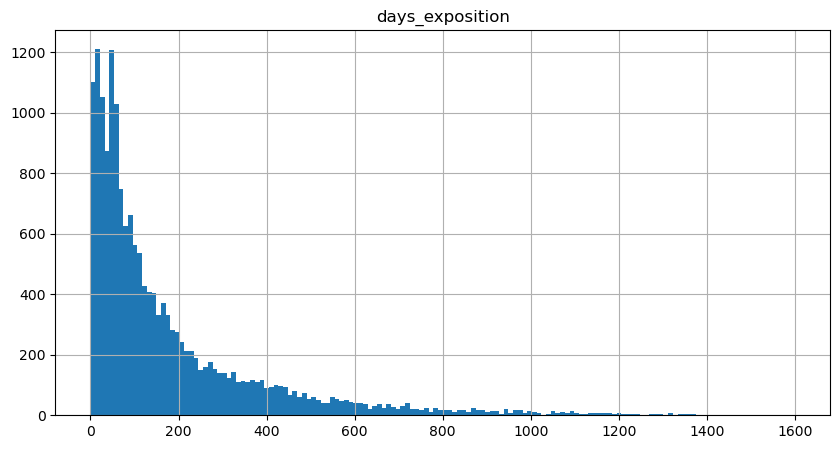

In [213]:
data.hist('days_exposition', bins=150, range=(0,1600), figsize=(10,5))

Посмотрим все основные статистические параметры

In [214]:
data['days_exposition'].describe()

count    17434.000000
mean       181.542847
std        217.597004
min          1.000000
25%         44.000000
50%         99.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

По гистограмме и основным параметрам видим, что в среднем объект "уходит" за 188 дней (то есть с хорошей точностью за пол-года), 
около половины объектов "укладываются" в 105 дней ( в три с половиной месяца).     
И хотя "особо сладкие" объекты "улетают" в один день, некоторым приходится ждать больше 4-х лет (1580 дней в максимуме).
если смотреть по четвертям, то можно разделить выборку по парметру скорости продажи следующим образом:      
до 45 дней (полтора месяца) - быстрая продажа. За это время успевают реализоваться 25% объектов;      
от 45 дней до 244 дней (семь месяцев) - это нормальный, обычный срок продажи. До этого срока продаются 75% объектов;     
больше 244 дней - это долгая продажа. 
По гистограмме видим, что количество объектов, не проданных поле 2-х лет уже крайне мало и составляет единицы процентов от общей массы объектов.

Посмотрим, а есть ли корреляция между заявленной ценой объекта и сроком реализации.    
Для этого посчитаем коэффициент корреляции Пирсона и построим диаграмму рассеяния для этих двух параметров

0.10294076067147045



<Axes: title={'center': 'Зависимость стоимости от длительности показа объявления'}, xlabel='last_price', ylabel='days_exposition'>

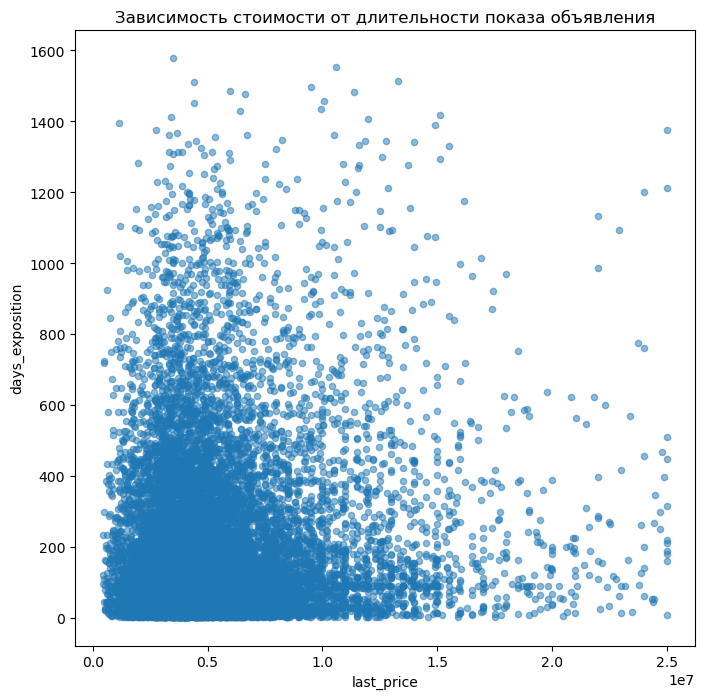

In [215]:
# посчитаем и выведем коэффициент корреляции
print(data['last_price'].corr(data['days_exposition']))

print()

# построим диаграмму рассеяния
data.plot( x = 'last_price', y = 'days_exposition', kind = 'scatter', alpha = 0.5, title='Зависимость стоимости от длительности показа объявления', figsize = (8,8))

Коэффициент корреляции (равный 0.1) и диграмма рассеяния наглядно показывают, что цена продажи и длительность экспозиции объявления никак между собой не связаны.

Перейдем к анализу зависимости цены продажи объекта от других его параметров.

### 3.	Какие факторы больше всего влияют на общую (полную) стоимость объекта? 
#### Изучите, зависит ли цена от: 
##### -	общей площади;
##### -	жилой площади;
##### -	площади кухни;
##### -	количества комнат;
##### -	этажа, на котором расположена квартира (первый, последний, другой);
###### -	даты размещения (день недели, месяц, год).

#### Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.


Для анализа зависимости стоимости объекта от различных его параметров будем поступать так-же, как мы сделали в случае со сроком экспозиции объявления: будем считать коэффициент корреляции Пирсона и строить диаграмму рассеяния для стоимости объекта и параметра, зависимость от которого анализируем.

Начнем с общей площади.

Интуитивно кажется, что это общая площадь квартиры - это основной параметр, от которого зависит стоимость и в этом случае корреляция должна быть высокой (на уровне 0.7-0.8 наверное); и диаграмма должна иметь форму четкого элипса, вытянутого из левого нижнего к правому верхнему углу.     
Проверим такую гипотезу.

0.7612652733983671



<Axes: title={'center': 'Зависимость стоимости от общей площади'}, xlabel='total_area', ylabel='last_price'>

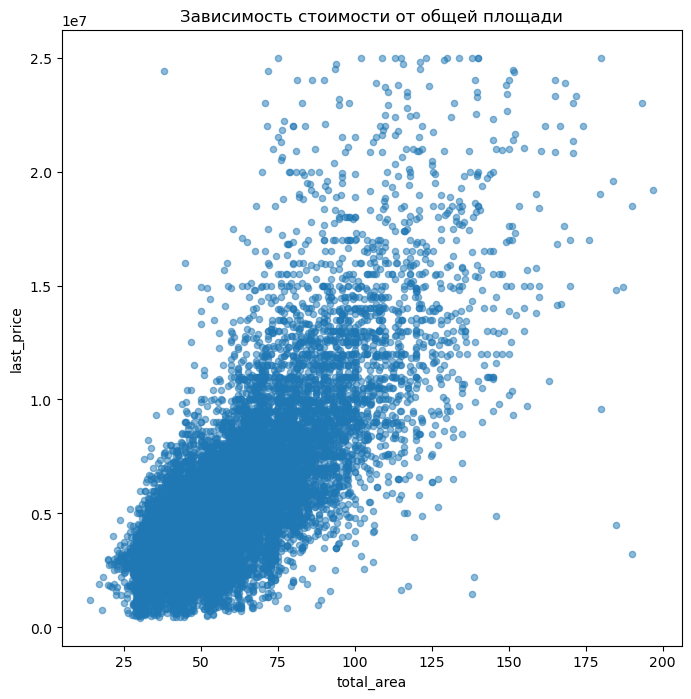

In [216]:
# считаем и выводим коэффициент корреляции
print(data['total_area'].corr(data['last_price']))

print()

# строим диаграмму рассеяния
data.plot( x = 'total_area', y = 'last_price', kind = 'scatter', alpha = 0.5, title='Зависимость стоимости от общей площади', figsize = (8,8))

Наша шипотеза подтвердилась:

Коэффициент корреляции между стоимостью объекта и его общей площадью равен 0.77.     
Диаграмма как мы и предполагали имеет форму четкого элипса, вытянутого из левого нижнего к правому верхнему углу. 

Это свидетельствует о том, что степень зависимости стоимости объекта от его общей площади велика.

Попутно отметим, что для более дорогих объектов корреляция становится гораздо менее выраженной, что свидетельствует о том, что более дорогие объекты более индивидуальны, площадь квартиры перстает является доминирующим ключевым параметром (места где жить уже хватает) и покупателей становится значим набор более мелких параметров (таких как статус дома, соседи, район, парк и т.п.).

Перейдем к жилой площади.

Думается, что это жилая площадь квартиры - это второй по значимости параметр, от которого зависит стоимость.    
Значит по всей видимости корреляция должна быть высокой, совсем немного ниже, чем в случае с общей площадью (ок. 0.7);     
и диаграмма должнапо прежнему иметь форму четкого элипса, вытянутого из левого нижнего к правому верхнему углу.

Проверим:

0.6479003332942826



<Axes: title={'center': 'Зависимость стоимости от жилой площади'}, xlabel='living_area', ylabel='last_price'>

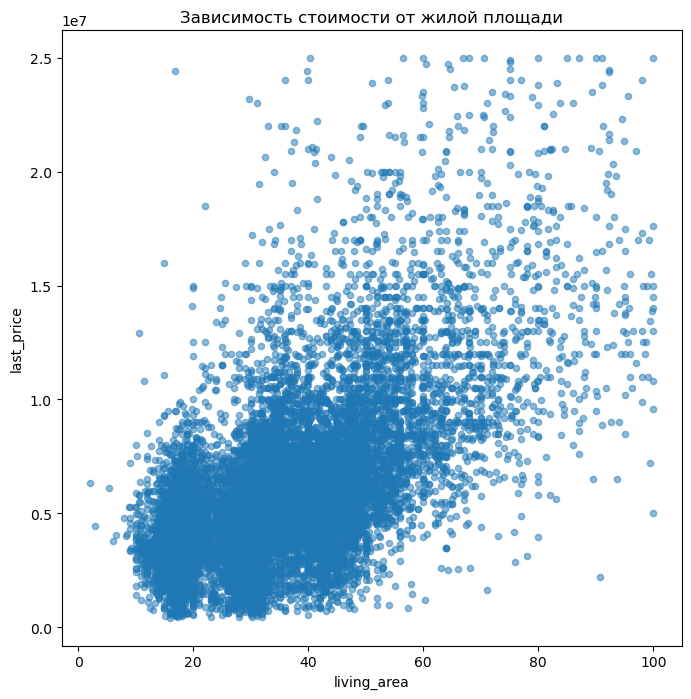

In [217]:
# считаем и выводим коэффициент корреляции
print(data['living_area'].corr(data['last_price']))

print()

# строим диаграмму рассеяния
data.plot( x = 'living_area', y = 'last_price', kind = 'scatter', alpha = 0.5,  title='Зависимость стоимости от жилой площади', figsize = (8,8))

Наша шипотеза подтвердилась с некоторыми корректировками:

Коэффициент корреляции между стоимостью объекта и его жилой площадью оказался ниже, чем мы предполагали и равен 0.66.     
Диаграмма при этом несколько юолее размыта, чем мы предполагали, однако форма элипса и его вытянутость из левого нижнего к правому верхнему углу прослеживается довольно четко.
При этом зависимость стоимоти при жилой площади выше 70 кв.м. начинает практически отсутствовать (места для жилья уже достаточно - начинают играть роль другие параметры).

Это свидетельствует о том, что зависимость стоимости объекта от его жилой площади есть, но она ниже зависимости от общей площади.    
При этом наши соображения относительно меньшей зависимости стоимоти от параметров площади квартиры при возрастании ее стоимости естественным образом подтверждаются и для жилой площади даже более показательно, чем для общей площади.

Теперь перейдем к площади кухни.

Площадь кухни видится важным парметром, однако менее значимым, и чем общая и чем жилая площадь.    
Значит по всей видимости корреляция между стоимотью квартиры и площадью кухни должна быть на уровне около 0.6;     
и диаграмма должнапо прежнему иметь форму размытого элипса, похожего уже на пятно, но все еще вытянутого из левого нижнего к правому верхнему углу.

Проверим:

0.5594141683958437



<Axes: title={'center': 'Зависимость стоимости от площади кухни'}, xlabel='kitchen_area', ylabel='last_price'>

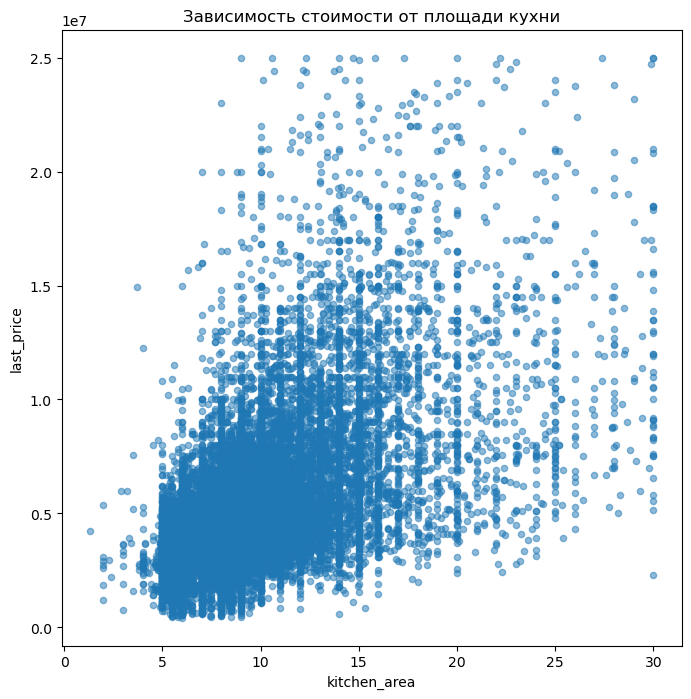

In [218]:
# считаем и выводим коэффициент корреляции
print(data['kitchen_area'].corr(data['last_price']))

print()

# строим диаграмму рассеяния
data.plot( x = 'kitchen_area', y = 'last_price', kind = 'scatter', alpha = 0.5, title='Зависимость стоимости от площади кухни', figsize = (8,8))

И здесь видим:

Коэффициент корреляции между стоимостью объекта и площадью его его кухни равен 0.57.     
Диаграмма при этом еще более размыта, чем в случае с жилой площадью, и уже более похожа на пятно, но с выраженной направленностью из левого нижнего к правому верхнему углу. 

Размытость (как показатель снижения зависимости) возрастает с увеличением как площади кухни, так и цены объекта.

Это свидетельствует о том, что зависимость стоимости объекта от площади его кухни есть, но уже слабая и выражена более явно для диапазона площадей кухни от 5 до 15 кв. м., резко размываясь за этими пределами. 

Посмотрим зависимость стоимости квартиры от количества комнат.

Навскидку кажется, что этот параметр должен быть столь же значим, как и общая площадь квартиры (если не больше)
То есть каэффициент корреляции для него ожидается на уровне 0.75-0.8.
и диаграмма должнапо прежнему иметь форму размытого элипса, похожего уже на пятно, но все еще вытянутого из левого нижнего к правому верхнему углу.

Проверим:

0.47258892977600164



<Axes: title={'center': 'Зависимость стоимости от количества комнат'}, xlabel='rooms', ylabel='last_price'>

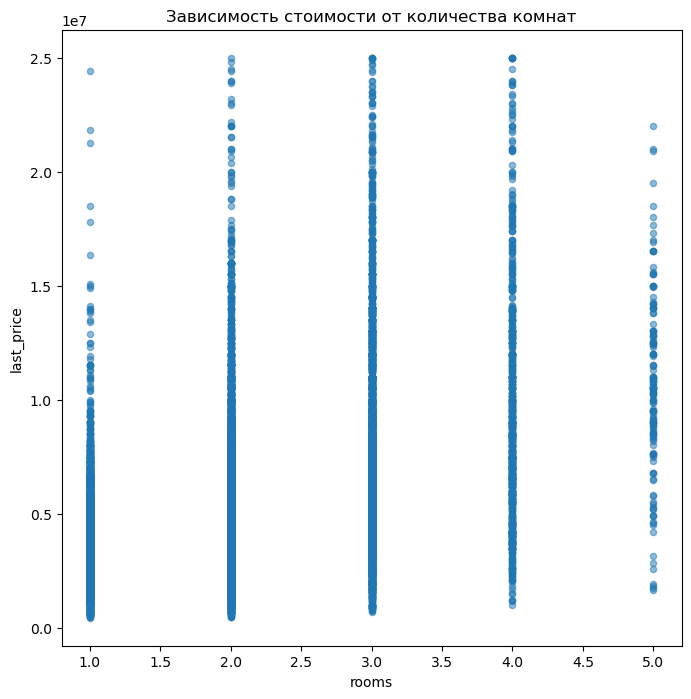

In [219]:
# считаем и выводим коэффициент корреляции
print(data['rooms'].corr(data['last_price']))

print()

# строим диаграмму рассеяния
data.plot( x = 'rooms', y = 'last_price', kind = 'scatter', alpha = 0.5,  title='Зависимость стоимости от количества комнат', figsize = (8,8))

По такой диаграмме зависимость не отследить.    
Поскольку корзин в виде количества комнат немного - можно попробовать вычислить медиану и среднее для каждой корзины и построить графика зависимости этих параметров.    
Попробуем:

In [220]:
# Создадим табличку со столбцами "количество комнат", "средняя стоимость" и "медианная стоимость"
room_price_compare = pd.DataFrame(columns=['rooms', 'price_median', 'price_mean'])

# зададим значения в столбцах
room_price_compare = data.groupby('rooms').agg({'last_price':['median', 'mean']})
room_price_compare.reset_index(inplace= True)
room_price_compare.columns = ['rooms', 'price_median', 'price_mean']
room_price_compare

,rooms,price_median,price_mean
0,1,3600000.0,3.806882e+06
1,2,4750000.0,5.341335e+06
2,3,6000000.0,7.028080e+06
3,4,8200000.0,9.152944e+06
4,5,10500000.0,1.066919e+07


<Axes: title={'center': 'зависимости средней и медианной стоимости от количества комнат'}, xlabel='rooms'>

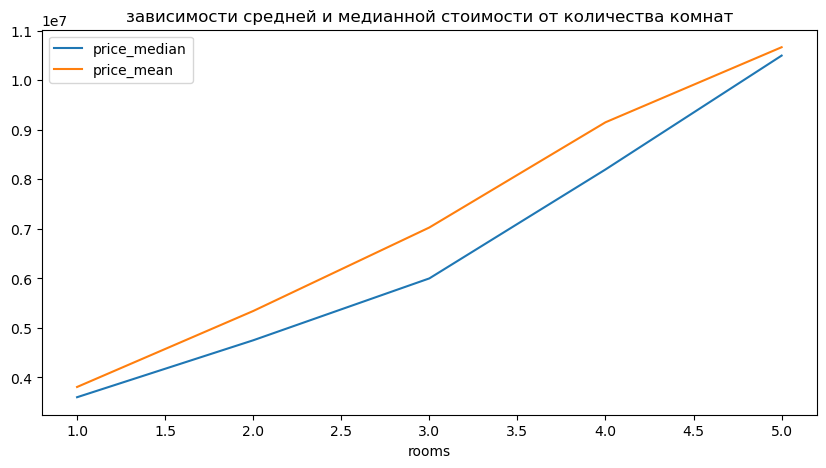

In [221]:
# и сделаем график зависимости средней и медианной стоимости, рассчитанной для каждой группы по кол-ву комнат
room_price_compare.plot( x = 'rooms', y = ['price_median','price_mean'], kind = 'line', alpha = 1, title='зависимости средней и медианной стоимости от количества комнат', figsize = (10,5))

Видим:     
Что коэффициент корреляции между стоимостью объекта и количеством комнат равен 0.47, что несколько ниже, чем для параметров общей и жилой площади, а так-же площади кухни.      
Тем не менее коэффициент корреляции остается существенно выше нуля и значит прямая зависимость есть.     
Это нашлядно подтверждается графиками зависимости среднего и медианы для каждого количества комнат (от одной до пяти):     
хорошо видна выраженная перманертная положительная зависимость. Выраженная - потому что наклон линии графика явно заметен; перманентная - потому что наклон остается заметным и не снижается сильно; положительная - потому что чем больше комнат - ткм больше стоимость (и средняя и медианная). 

Посмотрим что можно сказать о зависимости стоимости квартиры от категории этажа, на котором расположена квартира.     
Мы выделяли три категории: первый этаж ('first'), последний этаж ('last') и промежуточные этажи (не первый и не последний - 'mid').

Интуитивно кажется очевидным, что стоимость квартир в категориях "первый этаж" и "последний этаж" должна быть ниже чем в категории "промежуточные этажи". 

Попробуем это проверить и оценить. Сделаем это аналогично тому, как сделали только что, анализируя зависимость стоимости квартир от количества комнат. Однако без вычисления напрямую коэффициента корреляции, поскольку не очень понятно "к чему его прикладывать", ведь груупы квартир - это параметр не числовой.

In [222]:
# Создадим табличку со столбцами 'floor_category', 'price_median', 'price_mean'
floor_price_compare = pd.DataFrame(columns=['floor_category', 'price_median', 'price_mean'])

# зададим значения в столбцах
floor_price_compare = data.groupby('floor_category').agg({'last_price':['median', 'mean']})
floor_price_compare.reset_index(inplace= True)
floor_price_compare.columns = ['floor_category', 'price_median', 'price_mean']
floor_price_compare

,floor_category,price_median,price_mean
0,first,3900000.0,4.389804e+06
1,int,4792000.0,5.678432e+06
2,last,4200000.0,5.098247e+06


<Axes: title={'center': 'зависимости средней и медианной стоимости от типа этажа'}, xlabel='floor_category'>

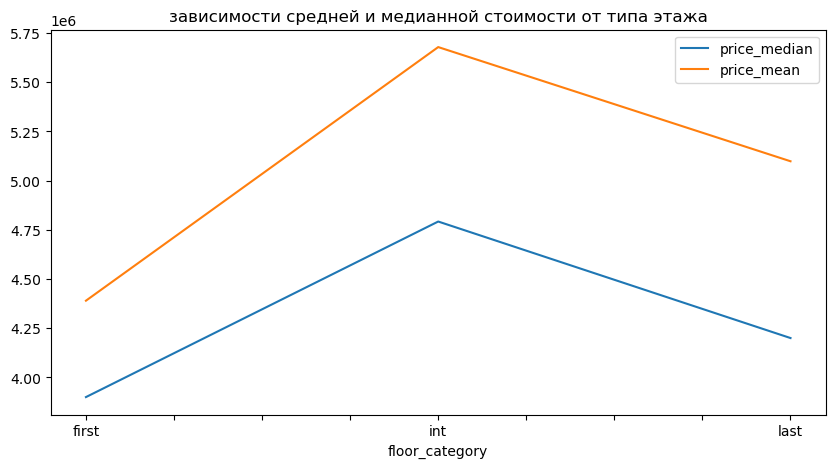

In [223]:
# и сделаем график зависимости средней и медианной стоимости, рассчитанной для каждой группы по этажу
floor_price_compare.plot( x= 'floor_category', y = ['price_median', 'price_mean'], kind = 'line', alpha = 1, title='зависимости средней и медианной стоимости от типа этажа', figsize = (10,5))

Таким образом наша интуитивная догадка подтвердилась - мы видим, что между категорией этажа и стоимотью квартиры есть довольно четкая зависисмоть: и среднее и медиана показывают самые низкие значения для квартир на первом этаже - (3.9 и 4.4 М рублей соответственно), кватриры на последнем этаже выше по ценам (по медиане) примерно на 7.7%, и самые высокие показатели у квартир на промежуточных (не первом и не последнем) этажах - их медианная стоимость достигает 4.8 миллиона рублей, что выше медианной стоимости "первоэтажэк" на 23%.

Теперь проверим конспирологическую гипотезу о том, что стоимость объекта недвижимости зависит от дня публикации объявления о его продаже.    
В столюце "weekday_of_exposition" мы размещали данные о дне размещения объявления о продаже. Сгруппируем данные о продаже по дням недели, рассчитаем коэффициент корреляции, возьмем среднее и медиану по дням, построим графики и посмотрим есть ли зависимость. 

In [224]:
# считаем и выводим коэффициент корреляции
print(data['weekday_of_exposition'].corr(data['last_price']))

-0.014909585478632737


In [225]:
# Создадим табличку со столбцами 'weekday_of_exposition', 'price_median', 'price_mean'
day_price_compare = pd.DataFrame(columns=['weekday_of_exposition', 'price_median', 'price_mean'])

# зададим значения в столбцах
day_price_compare = data.groupby('weekday_of_exposition').agg({'last_price':['median', 'mean']})
day_price_compare.reset_index(inplace= True)
day_price_compare.columns = ['weekday_of_exposition', 'price_median', 'price_mean']
day_price_compare

,weekday_of_exposition,price_median,price_mean
0,0,4600000.0,5.467432e+06
1,1,4680000.0,5.463166e+06
2,2,4600000.0,5.460928e+06
3,3,4600000.0,5.523126e+06
4,4,4500000.0,5.384712e+06
5,5,4500000.0,5.273703e+06
6,6,4500000.0,5.321728e+06


<Axes: title={'center': 'Зависимость средней и медианной стоимости от дня публикации объявления'}, xlabel='weekday_of_exposition'>

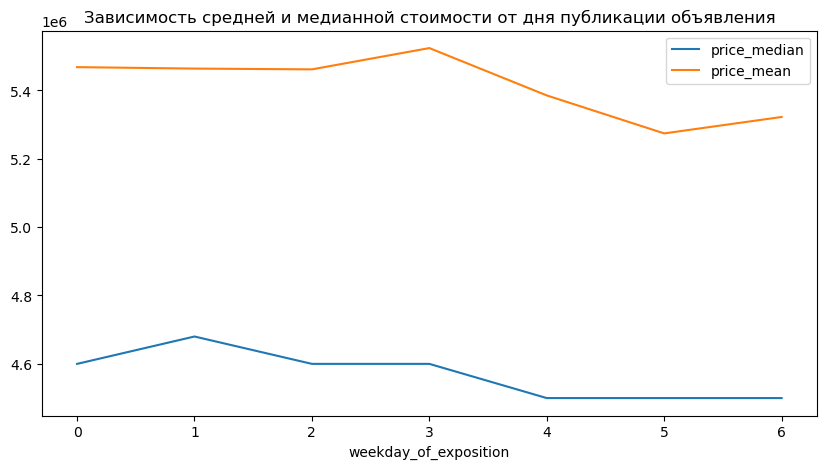

In [226]:
# и сделаем график зависимости средней и медианной стоимости, рассчитанной для каждого дня недели (0=Пн, 1=Вт и т.д.)
day_price_compare.plot( x= 'weekday_of_exposition', y = ['price_median', 'price_mean'], kind = 'line', alpha = 1, title='Зависимость средней и медианной стоимости от дня публикации объявления', figsize = (10,5))

Гипотеза проверена. Зависимости нет:

Видим, что коэффициент корреляции равен -0.015%. Это значит, что он практически равен нулю, что свидетельствует о полном отсутствии корреляции.
Шрафик показывает небольшое снижение стоимости объектов, выставленных на продажу в конце недели, однако это снижение небольшое, может быть вызвано массой разных причин и не врят-ли может рассматриваться как сколько-нибудь четкая закономерность.

Теперь перейдем к гнографическим зависимостям

А именно - проверим как влияет на стоимость квадратного метра недвижимости наличие парка и водоема поблизости. Начнем с парков.

In [227]:
# считаем и выводим коэффициент корреляции
print(data['parks_around3000'].corr(data['price_for_meter']))

0.2857108117847186


In [228]:
# Создадим табличку со столбцами 'parks_around3000', 'price_median', 'price_mean'
parks_price_compare = pd.DataFrame(columns=['parks_around3000', 'price_for_meter_median', 'price_for_meter_mean'])

# зададим значения в столбцах
parks_price_compare = data.groupby('parks_around3000').agg({'price_for_meter':['median', 'mean']})
parks_price_compare.reset_index(inplace= True)
parks_price_compare.columns = ['parks_around3000', 'price_for_meter_median', 'price_for_meter_mean']
parks_price_compare

,parks_around3000,price_for_meter_median,price_for_meter_mean
0,0,88378.46,87861.184412
1,1,103077.49,109451.865353
2,2,104545.45,111893.704490
3,3,101190.48,111634.630490


<Axes: title={'center': 'Зависимость средней и медианной стоимости от наличия парка'}, xlabel='parks_around3000'>

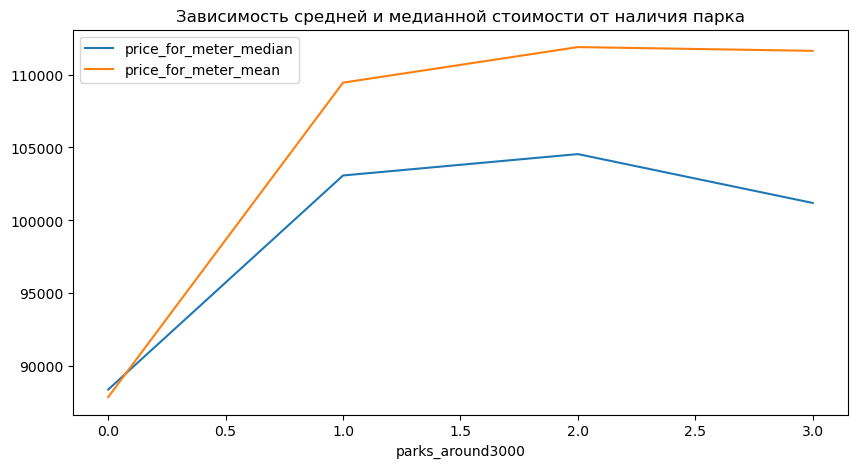

In [229]:
# и сделаем график зависимости средней и медианной стоимости, рассчитанной для случая наличия или отсутствия парка
parks_price_compare.plot( x= 'parks_around3000', y = ['price_for_meter_median', 'price_for_meter_mean'], kind = 'line', alpha = 1, title='Зависимость средней и медианной стоимости от наличия парка', figsize = (10,5))

Проделаем аналогичную процедуру для близлежащих водоемов

In [230]:
# считаем и выводим коэффициент корреляции
print(data['ponds_around3000'].corr(data['price_for_meter']))

0.29756723918209943


In [231]:
# Создадим табличку со столбцами 'ponds_around3000', 'price_median', 'price_mean'
ponds_price_compare = pd.DataFrame(columns=['ponds_around3000', 'price_for_meter_median', 'price_for_meter_mean'])

# зададим значения в столбцах
ponds_price_compare = data.groupby('ponds_around3000').agg({'price_for_meter':['median', 'mean']})
ponds_price_compare.reset_index(inplace= True)
ponds_price_compare.columns = ['ponds_around3000', 'price_for_meter_median', 'price_for_meter_mean']
ponds_price_compare

,ponds_around3000,price_for_meter_median,price_for_meter_mean
0,0,88306.770,87734.769590
1,1,100487.230,105181.042611
2,2,102159.505,107844.071504
3,3,110157.595,119738.358772


<Axes: title={'center': 'Зависимость средней и медианной стоимости от наличия водоема'}, xlabel='parks_around3000'>

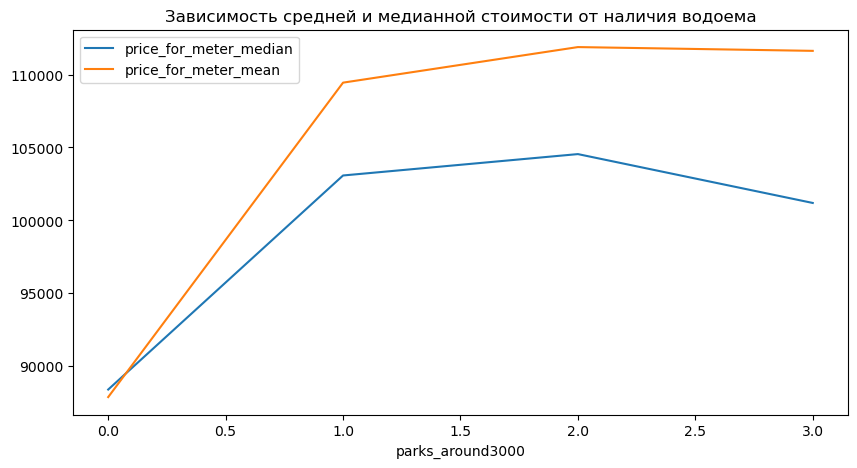

In [232]:
# и сделаем график зависимости средней и медианной стоимости, рассчитанной для случая наличия или отсутствия водоема
parks_price_compare.plot( x= 'parks_around3000', y = ['price_for_meter_median', 'price_for_meter_mean'], kind = 'line', alpha = 1, title='Зависимость средней и медианной стоимости от наличия водоема', figsize = (10,5))

Вывод:    
Наличие парков и водоемов слабо, но влияет на стоимоть недвижимости (коэффициент корреляции 0.27 и 0.29 соответственно).    
При этом наличие хотя бы одного парка и одного водоема оказывает довольно заметное влияние на цену, а вот добавление к первому парку и первому водоему второго, третьего и т.д. не оказывает никакого положительного влияния на цену, скорее даже способствует ее снижению.

Теперь перейдем к выявлению зависимости стоимости недвижимости от населенного пункта

### 4.	Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Сначала создадим столбец ценой квадратного метра для каждого объявления. 

In [233]:
data['price_for_meter'] = round(data['last_price'] / data['total_area'], 2)

data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_category,cityCenters_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,int,160.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,first,186.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,int,139.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,0,NaN,55.0,95065.79,0,9,2018,int,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.6,6,False,...,NaN,0,NaN,155.0,99195.71,3,11,2017,int,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23558,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,...,NaN,0,NaN,413.0,45000.00,4,7,2017,int,NaN
23559,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,352.0,1,675.0,239.0,73717.95,4,8,2016,int,341.0
23560,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3,381.0,NaN,72490.85,1,3,2017,int,42.0
23561,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,0,NaN,45.0,52542.37,0,1,2018,int,NaN


Выведем топ 10 населённых пунктов с наибольшим числом объявлений сразу же с колонками с количеством объявлений и средней ценой квадратного метра.

Можно при помощи группировки gropby() ...

In [234]:
top_localities = data.groupby('locality_name').agg({'price_for_meter':['count', 'mean']}). \
sort_values(by = ('price_for_meter','count'), ascending = False). \
head(10)

... но можно и с использованием функции pivot_table()

In [235]:
top_localities = data.pivot_table(index= 'locality_name', values = 'price_for_meter', aggfunc= ['count', 'mean']). \
sort_values(by = ('count','price_for_meter'), ascending = False).head(10)
top_localities

,count,mean
,price_for_meter,price_for_meter
locality_name,,
Санкт-Петербург,13287,108820.227635
Мурино,458,85750.545699
Шушары,390,78478.906667
Кудрово,374,95340.633155
Всеволожск,356,68985.368511
Пушкин,323,102431.122136
Колпино,321,75129.845452
Парголово,288,90756.002986


Посмотреть максимальную и минимальную среднюю стоимоть квадратного метра жилья в выбранных городах можно просто отсортировав данные по этой величине.

In [236]:
display(top_localities.sort_values(by = ('mean','price_for_meter'), ascending = False).head(10))

,count,mean
,price_for_meter,price_for_meter
locality_name,,
Санкт-Петербург,13287,108820.227635
Пушкин,323,102431.122136
Кудрово,374,95340.633155
Парголово,288,90756.002986
Мурино,458,85750.545699
Шушары,390,78478.906667
Колпино,321,75129.845452
Всеволожск,356,68985.368511


Чтобы автоматически определить максимум и минимум цены квадратного метра в приведенной выше таблице возьмем max() и min() по соответствующему столбцу

In [237]:
print('Максимальная средняя цена квадратного метра жилья равна  ', top_localities['mean', 'price_for_meter'].max())
print('Минимальная средняя цена квадратного метра жилья равна  ', top_localities['mean', 'price_for_meter'].min())

Максимальная средняя цена квадратного метра жилья равна   108820.2276352826
Минимальная средняя цена квадратного метра жилья равна   57946.241329787226


In [238]:
top_localities[(top_localities['mean', 'price_for_meter'] == top_localities['mean', 'price_for_meter'].max()) | \
               (top_localities['mean', 'price_for_meter'] == top_localities['mean', 'price_for_meter'].min())]


,count,mean
,price_for_meter,price_for_meter
locality_name,,
Санкт-Петербург,13287,108820.227635
Выборг,188,57946.241330


Или можно просто вывести названия городов с максимальной и минимальной величиной средней стоимоти квадратного метра

In [239]:
top_locs = top_localities[(top_localities['mean', 'price_for_meter'] == top_localities['mean', 'price_for_meter'].max()) | \
               (top_localities['mean', 'price_for_meter'] == top_localities['mean', 'price_for_meter'].min())]
top_locs.reset_index(inplace=True)
print(top_locs['locality_name'])

0    Санкт-Петербург
1             Выборг
Name: locality_name, dtype: object


Вывод:
Наибольшая цена за квадратный метр площади квартир ожидаемо оказалась в самом городе Санкт-Петербург - средняя цена здесь равна 108820 рублей за кв.м.
В топ самых "дорогих" городов области вошли Пушкин, Кудрово и Парголово.
Наименьшая средняя цена квадратного метра недвижимости среди топ 10 населенных пунктов СПБ и Ленинградской области оказалась в Выборге - 57946 рублей за кв.м., что на 47% ниже, чем в Санкт-Петербурге.

Будем считать, что географическим аспектом цены за квадратный метр жилья мы разобрались и перейдем теперь к такому параметру как цена за километр.

### 5.	Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

Сначала выдклим объявления, в которых продаются объекты недвижимости именно Санкт-Петербурга. 

In [240]:
locality_spb = data[data['locality_name'] == 'Санкт-Петербург']
locality_spb.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_category,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,int,160.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,int,139.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0,NaN,289.0,88524.59,6,2,2017,int,150.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310.0,2,553.0,137.0,127525.25,3,11,2017,int,139.0
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,590.0,1,296.0,19.0,119230.77,5,11,2017,int,143.0


Хотя мы и выяснили, что гео-данные в нашем датасете - весьма странные и по все видимости ошибочны, но если задача поставлена - попробуем выяснить стоимость "питерского километра".
Однако мы помним, что в данных о расстоянии до центра города имелось некоторое количество пропусков данных.
Посмотрим сколько их, и если их немного - исключим из рассмотрения, чтобы не путали.

In [241]:
locality_spb['cityCenters_km'].isna().sum()

35

Пропусков мало. Удалим их.

In [242]:
locality_spb = locality_spb.dropna(subset=['cityCenters_nearest', 'cityCenters_km'])
locality_spb['cityCenters_km'].isna().sum()

0

Вычислим среднюю цену каждого километра и сформируем столбец с этим параметром в датасете locality_spb.

In [243]:
locality_spb['price_for_km'] = round(locality_spb['last_price'] / locality_spb['cityCenters_km'], 2)

locality_spb.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_category,cityCenters_km,price_for_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.37,3,3,2019,int,160.0,81250.00
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.71,3,8,2015,int,139.0,37381.29
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0,NaN,289.0,88524.59,6,2,2017,int,150.0,36000.00
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2,553.0,137.0,127525.25,3,11,2017,int,139.0,36330.94
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,1,296.0,19.0,119230.77,5,11,2017,int,143.0,32517.48


In [244]:
price_for_km = locality_spb.groupby('cityCenters_km').agg({'price_for_km' : ['mean']})
price_for_km.reset_index(inplace=True)
price_for_km.columns = ['cityCenters_km' , 'price_for_km_mean']
price_for_km

,cityCenters_km,price_for_km_mean
0,2.0,4.197500e+06
1,3.0,3.143333e+06
2,4.0,2.856250e+06
3,5.0,1.446667e+06
4,6.0,2.009861e+06
...,...,...
249,280.0,1.641965e+04
250,281.0,2.704626e+04
251,286.0,1.669581e+04
252,288.0,1.517361e+04


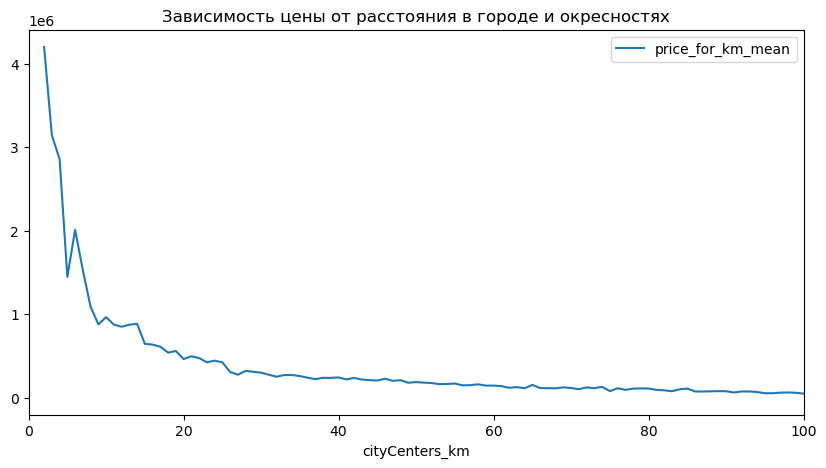

In [245]:
price_for_km.plot( x= 'cityCenters_km', y = 'price_for_km_mean', kind = 'line', xlim=(0,100), alpha = 1, \
                     title= 'Зависимость цены от расстояния в городе и окресностях', figsize = (10,5))
plt.show()

Для цены квадратного метра недвижимости картина получается очень похожей.

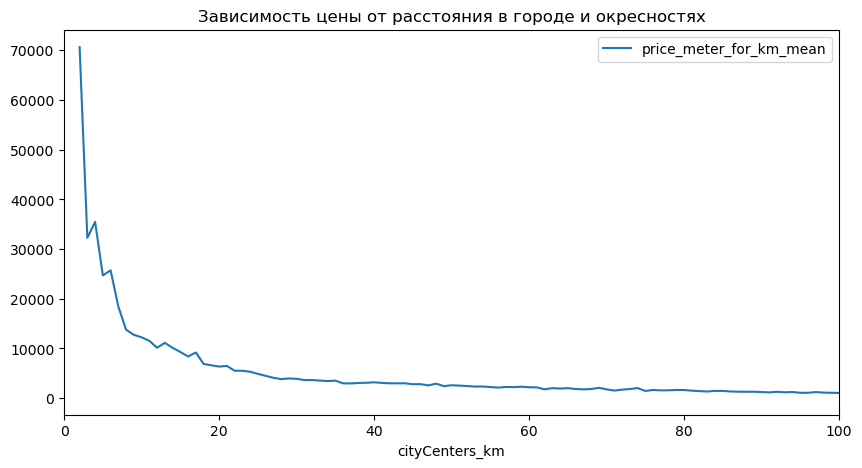

In [246]:
locality_spb['price_meter_for_km'] = round(locality_spb['price_for_meter'] / locality_spb['cityCenters_km'], 2)

price_m2_for_km = locality_spb.groupby('cityCenters_km').agg({'price_meter_for_km' : ['mean']})
price_m2_for_km.reset_index(inplace=True)
price_m2_for_km.columns = ['cityCenters_km' , 'price_meter_for_km_mean']

price_m2_for_km.plot( x= 'cityCenters_km', y = 'price_meter_for_km_mean', kind = 'line', xlim=(0,100), alpha = 1, \
                     title= 'Зависимость цены от расстояния в городе и окресностях', figsize = (10,5))
plt.show()

Итак:

Средняя цена одного километра расстояния от центра города равна 1357 рублей, медианная - 845 рублей.     
То есть при отдалении от центра на один километр цена квартиры площадбю 50 кв.м. сризится на примерно на 45-60 тысяч (в зависимости от того, где находится сам этот километр: в центре города - больше, на окраинах - меньше). И так каждый километр - минус 60 тысяч (если смотреть по среднему).
Из графика же видно, что стоимость квадратного метра недвижимости резко падает в пределах 30 км. от центра указанными выше темпами, а затем снижается гораздо медленнее и на более дальних расстояниях уже практически стагнирует.

Однако следует иметь ввиду, что хотя эти данные и хорошо укладываются в интуитивную логику (чем ближе к центру тем дороже), однако достоверность этих данных довольно низка, вследствие выявленных нами проблем с определением местоположения объектов гео-сервисами.

#### Общие выводы:

Были проанализированы данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет с целью определить параметры, от которых зависит рыночная цена объекта недвижимости.

В целом представленная выборка была полна и репрезентетивна. Однако в параметрах расстояния до центра города и до аэропорта, а так-же до ближайшего парка и водоема были выявлены нестыковки и возможные ошибки. Поэтому достоверность выводов относительно этих параметров низкие.

Выставленные объекты недвижимости в Санкт-Петербурге и области общей площадью от 14 до 197 кв. м. варьируются по стоимости от 4 до 250 миллионов рублей.   
Средняя цена объекта равна 5.4 миллиона рублей, медианное значение - 4.6 миллиона.   

Была посчитана цена квадратного метра недвижимости. 
Средняя цена квадратного метра недвижимости составила 95290 рублей, медианное значение - 94152 рубля.     
При этом наибольшая цена за квадратный метр площади квартир ожидаемо оказалась в самом городе Санкт-Петербург - средняя цена здесь равна 108820 рублей за кв.м., что на 15% выше, чем в целом по выборке.     
В топ самых "дорогих" городов области вошли Пушкин, Кудрово и Парголово.     
Наименьшая средняя цена квадратного метра недвижимости среди топ 10 населенных пунктов СПБ и Ленинградской области оказалась в Выборге - 57946 рублей за кв.м., что на 47% ниже, чем в Санкт-Петербурге.

Были проанализированы основные характеристики, влияющие на стоимость квадратного метра жилья.

Было выявлено, что на цену квадратного метра влияют прежде всего основные параметры самого объекта недвижимости:             
общая площадь - влияние доминирующее (коэффициент корреляции 0,76);
жилая площадь - влияние чуть ниже, но так-же определяющее (коэффициент корреляции 0,65);
площадь кухни - влияние значительное (коэффициент корреляции 0,56);     
несколько ниже влияние параметра количества комнат (коэффициент корреляции 0,47).      
При этому влияние указанных параметров серьезно размывается по мере их роста. То есть с какого то момента площади квартиры (общей, жилой, кухни) становится достаточно и на стоимоть начинает больше влиять совокупность менее значимых факторов.

Было отчетливо подтверждено, что есть довольно четкая зависисмоть между категорией этажа и стоимотью квартиры: и среднее и медиана показывают самые низкие значения для квартир на первом этаже - (3.9 и 4.4 М рублей соответственно), кватриры на последнем этаже выше по ценам примерно на 7.7%, и самые высокие показатели у квартир на промежуточных (не первом и не последнем) этажах - их медианная стоимость достигает 4.8 миллиона рублей, что выше медианной стоимости квартир на первом этаже на 23%. 

Наличие поблизости с объектом недвижимости хотя бы одного парка и одного водоема оказывает слабое, но заметное влияние на цену объекта (коэффициент корреляции 0.27 для парков и 0.29 - для водоемов), а вот добавление к первому парку и первому водоему второго, третьего и т.д. не оказывает никакого положительного влияния на цену, скорее даже способствует ее снижению.

Кроме того была выявлена явная тенденция снижения стоимости недвижимости по мере удаления от центра Санкт-Петербурга.     
Средний темп снижения стоимости 1357 рублей за километр. То есть при отдалении от центра на один километр цена квартиры площадью 50 кв.м. сризится на примерно на 45-60 тысяч (в зависимости от того, где находится сам этот километр: в центре города - больше, на окраинах - меньше).     
Однако следует иметь ввиду, что хотя эти данные и хорошо укладываются в интуитивную логику (чем ближе к центру тем дороже), однако достоверность этих данных довольно низка, вследствие выявленных нами проблем с определением местоположения объектов гео-сервисами.

Другие параметры, представленные в выборке (как то наличие парка, водоема, день выставления объекта на продажу) не оказывают заметного влияния на цену объекта.

#### Проект выполнил Александр Кийко.
##### a.m.kiyko@yandex.ru

<div class="alert alert-block alert-success">

## Итоговый комментарий от ревьюера:
    
#### Успех

Спасибо большое тебе за такую качественную работу. Мне было приятно проверять проект и делиться обратной связью. Особенно впечатлила Предобработка данных. Все достаточно структурировано и последовательно. 
Ты применяешь верные навыки для работы с кодом. 
Еще хочу отметить понятные и информативные графики. 
</div>